In [1]:
from mueller_matrices import M_Retarder, M_Diattenuator, M_rotate, M_LinearPolarizer, stokes2ellipse
from plotting import plotEllipse, plotEllipseStokes
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Simulating Different LC Configurations

In [2]:
HWP = M_Retarder(theta=0,delta=np.pi/4)
QWP = M_Retarder(theta=np.pi/4,delta=np.pi/2)

HWP
# HWP

Matrix([
[1, 0,                  0,                 0],
[0, 1,                  0,                 0],
[0, 0,  0.707106781186548, 0.707106781186547],
[0, 0, -0.707106781186547, 0.707106781186548]])

In [2]:
def M_inst(e):
    M = sp.Matrix([[1, 0, 0, -1],
                  [1, np.cos(2*np.arctan(e)), 0, -np.sin(2*np.arctan(e))],
                  [1, -0.5*np.cos(2*np.arctan(e)), np.sqrt(3)/2*np.cos(2*np.arctan(e)), -np.sin(2*np.arctan(e))],
                  [1, -0.5*np.cos(2*np.arctan(e)), -np.sqrt(3)/2*np.cos(2*np.arctan(e)), -np.sin(2*np.arctan(e))]])
                   
    return M



#LCP
M_analyzer = sp.Matrix([[1, 0, 0, -1],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0],
                        [-1, 0, 0, 1]])/2

M_analyzerVert = sp.Matrix([[1, 1, 0, 0],
                            [1, 1, 0, 0],
                            [0, 0, 0, 0],
                            [0, 0, 0, 0]])

M_horiz_pol = sp.Matrix([[1,-1,0,0],
                         [-1,1,0,0],
                         [0, 0, 0, 0],
                         [0, 0, 0, 0]])

M_lin_45 = M_rotate(M_analyzerVert, np.pi/4)
M_lin_90 = M_rotate(M_analyzerVert, np.pi/2)
M_lin_135 = M_rotate(M_analyzerVert, 3*np.pi/4)

M_60 = M_rotate(M_analyzerVert, -np.pi/3)
M_120 = M_rotate(M_analyzerVert, -2*np.pi/3)



NameError: name 'sp' is not defined

In [1]:
M = M_inst(1)

NameError: name 'M_inst' is not defined

In [83]:
%%time
lca = np.arange(-1.5,1.5,0.01)
lcb = np.arange(-1.5,1.5,0.01)
S_in = sp.Matrix([1, -1, 0, 0])

# get ellipticity, orientation
e = np.empty([len(lca),len(lcb)])
theta = np.empty([len(lca),len(lcb)])
S0 = np.empty([len(lca),len(lcb)])
S1 = np.empty([len(lca),len(lcb)])
S2 = np.empty([len(lca),len(lcb)])
S3 = np.empty([len(lca),len(lcb)])

for i in range(len(lca)):
    for j in range(len(lcb)):
        M_uni = M_Retarder(theta=0, delta = lcb[j]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = lca[i]*2*np.pi)
        S_out = M_uni * S_in
        S_final = M_analyzer * S_out
#         S_final = S_out
        S0[i,j] = S_final[0]
        S1[i,j] = S_final[1]
        S2[i,j] = S_final[2]
        S3[i,j] = S_final[3]
        ellipt,orient=stokes2ellipse(np.array(S_out).astype(np.float64))
        e[i,j] = ellipt
        theta[i,j] = orient

CPU times: user 1min 24s, sys: 310 ms, total: 1min 25s
Wall time: 1min 25s


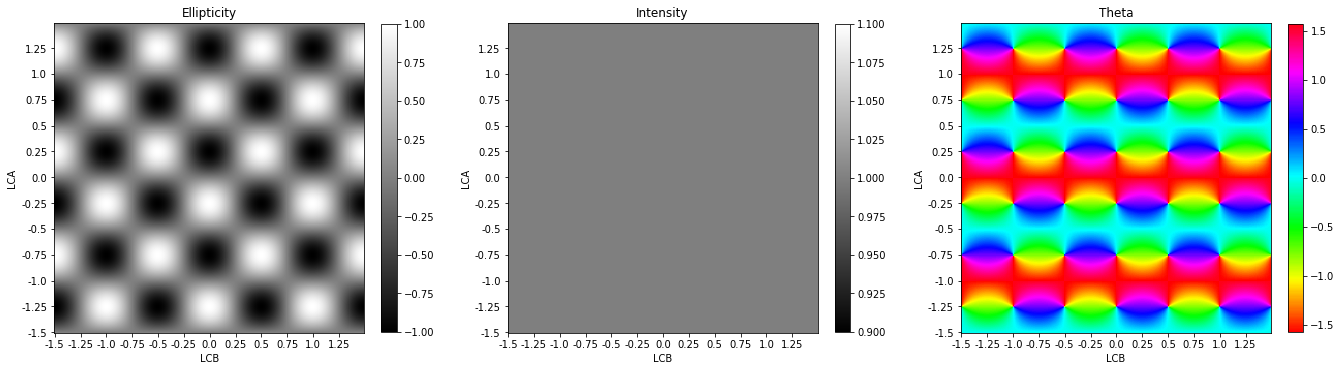

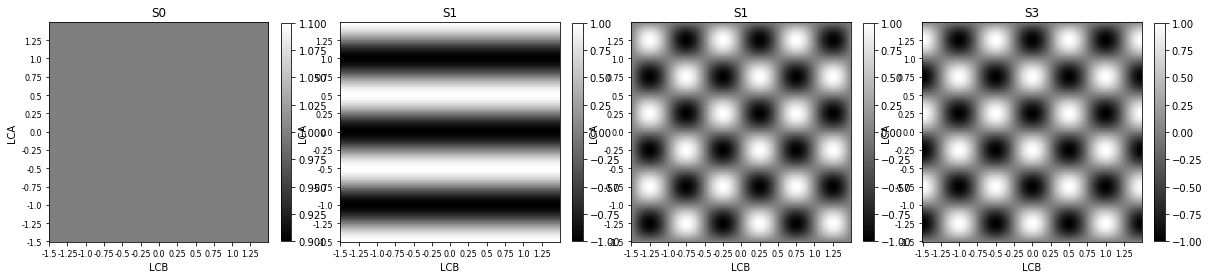

In [84]:
fig, ax = plt.subplots(1,3, figsize=(20,20))
fig.tight_layout(pad=8)
im1 = ax[0].imshow(e, "gray", origin = 'lower')
ax[0].set_title('Ellipticity')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,300,25))
ax[0].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[0].set_yticks(np.arange(0,300,25))
ax[0].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)

im2 = ax[1].imshow(S0, "gray", origin = 'lower')
ax[1].set_title('Intensity')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,300,25))
ax[1].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[1].set_yticks(np.arange(0,300,25))
ax[1].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(theta, "hsv", origin = 'lower')
ax[2].set_title('Theta')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,300,25))
ax[2].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[2].set_yticks(np.arange(0,300,25))
ax[2].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)
# fig.savefig('/Users/cameron.foltz/Desktop/SlidePics/200824_Calibration/sim_overview.png')


fig, ax = plt.subplots(1,4, figsize=(20,20))
im1 = ax[0].imshow(S0, "gray", origin = 'lower')
ax[0].set_title('S0')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,300,25))
ax[0].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[0].set_yticks(np.arange(0,300,25))
ax[0].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im1, ax=ax[0], fraction=0.045)


im2 = ax[1].imshow(S1, "gray", origin = 'lower')
ax[1].set_title('S1')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,300,25))
ax[1].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[1].set_yticks(np.arange(0,300,25))
ax[1].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(S2, "gray", origin = 'lower')
ax[2].set_title('S2')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,300,25))
ax[2].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[2].set_yticks(np.arange(0,300,25))
ax[2].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im3, ax=ax[2], fraction=0.045)

im4 = ax[3].imshow(S3, "gray", origin = 'lower')
ax[3].set_title('S3')
ax[3].set_xlabel('LCB')
ax[3].set_ylabel('LCA')
ax[3].set_xticks(np.arange(0,300,25))
ax[3].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[3].set_yticks(np.arange(0,300,25))
ax[3].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im4, ax=ax[3], fraction=0.045)

## ZOOM IN

Run the same simulation but confine the region to LCA: [.2, .3], LCB: [.45,.55]

In [82]:
%%time

lca_z = np.arange(0.2,0.3,0.0005)
lcb_z = np.arange(0.45,0.55-0.0005,0.0005)
S_in = sp.Matrix([1, -1, 0, 0])

# get ellipticity, orientation
ez = np.empty([len(lca_z),len(lcb_z)])
thetaz = np.empty([len(lca_z),len(lcb_z)])
S0z = np.empty([len(lca_z),len(lcb_z)])
S1z = np.empty([len(lca_z),len(lcb_z)])
S2z = np.empty([len(lca_z),len(lcb_z)])
S3z = np.empty([len(lca_z),len(lcb_z)])


for i in range(len(lca_z)):
    for j in range(len(lcb_z)):
        M_uni = M_Retarder(theta=0, delta = lcb_z[j]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = lca_z[i]*2*np.pi)
        S_out = M_uni * S_in
#         print(S_out)
        S_final = M_analyzer * S_out
        S0z[i,j] = S_final[0]
        S1z[i,j] = S_final[1]
        S2z[i,j] = S_final[2]
        S3z[i,j] = S_final[3]
        ellipt,orient=stokes2ellipse(np.array(S_out).astype(np.float64))
        ez[i,j] = ellipt
        thetaz[i,j] = orient

Matrix([[1], [-0.309016994374947], [-0.293892626146237], [0.904508497187474]])
Matrix([[1], [-0.309016994374947], [-0.291049583269815], [0.905427323017116]])
Matrix([[1], [-0.309016994374947], [-0.288203667851509], [0.906337212644615]])
Matrix([[1], [-0.309016994374947], [-0.285354907979353], [0.907238157089729]])
Matrix([[1], [-0.309016994374947], [-0.282503331769457], [0.908130147460500]])
Matrix([[1], [-0.309016994374947], [-0.279648967365729], [0.909013174953342]])
Matrix([[1], [-0.309016994374947], [-0.276791842939591], [0.909887230853131]])
Matrix([[1], [-0.309016994374947], [-0.273931986689709], [0.910752306533287]])
Matrix([[1], [-0.309016994374947], [-0.271069426841709], [0.911608393455864]])
Matrix([[1], [-0.309016994374947], [-0.268204191647902], [0.912455483171628]])
Matrix([[1], [-0.309016994374947], [-0.265336309387001], [0.913293567320147]])
Matrix([[1], [-0.309016994374947], [-0.262465808363847], [0.914122637629867]])
Matrix([[1], [-0.309016994374947], [-0.2595927169091

Matrix([[1], [-0.309016994374947], [0.157624419601177], [0.937903534236259]])
Matrix([[1], [-0.309016994374947], [0.160570147762604], [0.937403714967553]])
Matrix([[1], [-0.309016994374947], [0.163514291161496], [0.936894643902625]])
Matrix([[1], [-0.309016994374947], [0.166456820740347], [0.936376326065802]])
Matrix([[1], [-0.309016994374947], [0.169397707457580], [0.935848766572671]])
Matrix([[1], [-0.309016994374947], [0.172336922287829], [0.935311970630031]])
Matrix([[1], [-0.309016994374947], [0.175274436222229], [0.934765943535842]])
Matrix([[1], [-0.309016994374947], [0.178210220268706], [0.934210690679171]])
Matrix([[1], [-0.309016994374947], [0.181144245452255], [0.933646217540138]])
Matrix([[1], [-0.309016994374947], [0.184076482815232], [0.933072529689867]])
Matrix([[1], [-0.309016994374947], [0.187006903417638], [0.932489632790424]])
Matrix([[1], [-0.309016994374947], [0.189935478337405], [0.931897532594767]])
Matrix([[1], [-0.309016994374947], [0.192862178670682], [0.93129

Matrix([[1], [-0.306027642188501], [0.0567927397698456], [0.950327136793421]])
Matrix([[1], [-0.306027642188501], [0.0597779953495807], [0.950144027760283]])
Matrix([[1], [-0.306027642188501], [0.0627626609446355], [0.949951541189179]])
Matrix([[1], [-0.306027642188501], [0.0657467070975651], [0.949749678979874]])
Matrix([[1], [-0.306027642188501], [0.0687301043570382], [0.949538443124668]])
Matrix([[1], [-0.306027642188501], [0.0717128232781287], [0.949317835708372]])
Matrix([[1], [-0.306027642188501], [0.0746948344226056], [0.949087858908292]])
Matrix([[1], [-0.306027642188501], [0.0776761083592222], [0.948848514994208]])
Matrix([[1], [-0.306027642188501], [0.0806566156640081], [0.948599806328346]])
Matrix([[1], [-0.306027642188501], [0.0836363269205593], [0.948341735365361]])
Matrix([[1], [-0.306027642188501], [0.0866152127203304], [0.948074304652309]])
Matrix([[1], [-0.306027642188501], [0.0895932436629195], [0.947797516828623]])
Matrix([[1], [-0.306027642188501], [0.09257039035636

Matrix([[1], [-0.303035269632774], [-0.113497133203780], [0.946196610706842]])
Matrix([[1], [-0.303035269632774], [-0.110524013686959], [0.946548502590922]])
Matrix([[1], [-0.303035269632774], [-0.107549803342744], [0.946891052423418]])
Matrix([[1], [-0.303035269632774], [-0.104574531525390], [0.947224256823503]])
Matrix([[1], [-0.303035269632774], [-0.101598227599627], [0.947548112502582]])
Matrix([[1], [-0.303035269632774], [-0.0986209209403760], [0.947862616264332]])
Matrix([[1], [-0.303035269632774], [-0.0956426409324493], [0.948167765004727]])
Matrix([[1], [-0.303035269632774], [-0.0926634169702694], [0.948463555712072]])
Matrix([[1], [-0.303035269632774], [-0.0896832784575739], [0.948749985467032]])
Matrix([[1], [-0.303035269632774], [-0.0867022548071261], [0.949027051442662]])
Matrix([[1], [-0.303035269632774], [-0.0837203754404269], [0.949294750904431]])
Matrix([[1], [-0.303035269632774], [-0.0807376697874210], [0.949553081210255]])
Matrix([[1], [-0.303035269632774], [-0.077754

Matrix([[1], [-0.303035269632774], [0.291638020938865], [0.907257896136184]])
Matrix([[1], [-0.300039906241276], [-0.294779546412497], [0.907238157089730]])
Matrix([[1], [-0.300039906241276], [-0.291927923693913], [0.908159755786661]])
Matrix([[1], [-0.300039906241276], [-0.289073419764579], [0.909072391313441]])
Matrix([[1], [-0.300039906241276], [-0.286216062797296], [0.909976054662726]])
Matrix([[1], [-0.300039906241276], [-0.283355880993022], [0.910870736915724]])
Matrix([[1], [-0.300039906241276], [-0.280492902580599], [0.911756429242282]])
Matrix([[1], [-0.300039906241276], [-0.277627155816466], [0.912633122900975]])
Matrix([[1], [-0.300039906241276], [-0.274758668984389], [0.913500809239189]])
Matrix([[1], [-0.300039906241276], [-0.271887470395173], [0.914359479693211]])
Matrix([[1], [-0.300039906241276], [-0.269013588386390], [0.915209125788311]])
Matrix([[1], [-0.300039906241276], [-0.266137051322094], [0.916049739138824]])
Matrix([[1], [-0.300039906241276], [-0.26325788759254

Matrix([[1], [-0.300039906241276], [0.104678483831401], [0.948165845032126]])
Matrix([[1], [-0.300039906241276], [0.107656713217505], [0.947832309410230]])
Matrix([[1], [-0.300039906241276], [0.110633880075312], [0.947489419066096]])
Matrix([[1], [-0.300039906241276], [0.113609955021389], [0.947137177383912]])
Matrix([[1], [-0.300039906241276], [0.116584908683074], [0.946775587840163]])
Matrix([[1], [-0.300039906241276], [0.119558711698778], [0.946404654003590]])
Matrix([[1], [-0.300039906241276], [0.122531334718265], [0.946024379535161]])
Matrix([[1], [-0.300039906241276], [0.125502748402947], [0.945634768188032]])
Matrix([[1], [-0.300039906241276], [0.128472923426170], [0.945235823807509]])
Matrix([[1], [-0.300039906241276], [0.131441830473505], [0.944827550331012]])
Matrix([[1], [-0.300039906241276], [0.134409440243038], [0.944409951788035]])
Matrix([[1], [-0.300039906241276], [0.137375723445660], [0.943983032300108]])
Matrix([[1], [-0.300039906241276], [0.140340650805352], [0.94354

Matrix([[1], [-0.297041581577035], [-0.0149983603941423], [0.954746745477407]])
Matrix([[1], [-0.297041581577035], [-0.0119988659524854], [0.954789152656265]])
Matrix([[1], [-0.297041581577035], [-0.00899925308686570], [0.954822136451649]])
Matrix([[1], [-0.297041581577035], [-0.00599955140225077], [0.954845696538025]])
Matrix([[1], [-0.297041581577035], [-0.00299979050448603], [0.954859832682862]])
Matrix([[1], [-0.297041581577035], [-7.38933919815586e-17], [0.954864544746643]])
Matrix([[1], [-0.297041581577035], [0.00299979050448630], [0.954859832682862]])
Matrix([[1], [-0.297041581577035], [0.00599955140225147], [0.954845696538025]])
Matrix([[1], [-0.297041581577035], [0.00899925308686598], [0.954822136451649]])
Matrix([[1], [-0.297041581577035], [0.0119988659524857], [0.954789152656265]])
Matrix([[1], [-0.297041581577035], [0.0149983603941430], [0.954746745477407]])
Matrix([[1], [-0.297041581577035], [0.0179977068080383], [0.954694915333619]])
Matrix([[1], [-0.297041581577035], [0.

Matrix([[1], [-0.294040325232304], [-0.176147346601988], [0.939421310926232]])
Matrix([[1], [-0.294040325232304], [-0.173195203116015], [0.939970057371448]])
Matrix([[1], [-0.294040325232304], [-0.170241350263309], [0.940509526691679]])
Matrix([[1], [-0.294040325232304], [-0.167285817197205], [0.941039713562581]])
Matrix([[1], [-0.294040325232304], [-0.164328633087621], [0.941560612751423]])
Matrix([[1], [-0.294040325232304], [-0.161369827120771], [0.942072219117140]])
Matrix([[1], [-0.294040325232304], [-0.158409428498875], [0.942574527610385]])
Matrix([[1], [-0.294040325232304], [-0.155447466439872], [0.943067533273575]])
Matrix([[1], [-0.294040325232304], [-0.152483970177132], [0.943551231240944]])
Matrix([[1], [-0.294040325232304], [-0.149518968959166], [0.944025616738587]])
Matrix([[1], [-0.294040325232304], [-0.146552492049340], [0.944490685084511]])
Matrix([[1], [-0.294040325232304], [-0.143584568725584], [0.944946431688680]])
Matrix([[1], [-0.294040325232304], [-0.1406152282801

Matrix([[1], [-0.294040325232304], [0.272419420151775], [0.916148430474807]])
Matrix([[1], [-0.294040325232304], [0.275296236261315], [0.915288080025975]])
Matrix([[1], [-0.294040325232304], [0.278170335308145], [0.914418696053310]])
Matrix([[1], [-0.294040325232304], [0.281041688926066], [0.913540287137281]])
Matrix([[1], [-0.294040325232304], [0.283910268775979], [0.912652861947429]])
Matrix([[1], [-0.294040325232304], [0.286776046546158], [0.911756429242282]])
Matrix([[1], [-0.294040325232304], [0.289638993952535], [0.910850997869270]])
Matrix([[1], [-0.294040325232304], [0.292499082738972], [0.909936576764634]])
Matrix([[1], [-0.291036166828272], [-0.295640282655000], [0.909887230853131]])
Matrix([[1], [-0.291036166828272], [-0.292780333391872], [0.910811520555626]])
Matrix([[1], [-0.291036166828272], [-0.289917494505055], [0.911726820916122]])
Matrix([[1], [-0.291036166828272], [-0.287051794249611], [0.912633122900975]])
Matrix([[1], [-0.291036166828272], [-0.284183260908845], [0.

Matrix([[1], [-0.291036166828272], [0.122889117888495], [0.948786706432217]])
Matrix([[1], [-0.291036166828272], [0.125869207899201], [0.948395957446432]])
Matrix([[1], [-0.291036166828272], [0.128848055631640], [0.947995848175430]])
Matrix([[1], [-0.291036166828272], [0.131825631685788], [0.947586382568127]])
Matrix([[1], [-0.291036166828272], [0.134801906674172], [0.947167564665785]])
Matrix([[1], [-0.291036166828272], [0.137776851222158], [0.946739398601967]])
Matrix([[1], [-0.291036166828272], [0.140750435968246], [0.946301888602498]])
Matrix([[1], [-0.291036166828272], [0.143722631564353], [0.945855038985427]])
Matrix([[1], [-0.291036166828272], [0.146693408676111], [0.945398854160978]])
Matrix([[1], [-0.291036166828272], [0.149662737983148], [0.944933338631511]])
Matrix([[1], [-0.291036166828272], [0.152630590179382], [0.944458496991477]])
Matrix([[1], [-0.291036166828272], [0.155596935973310], [0.943974333927371]])
Matrix([[1], [-0.291036166828272], [0.158561746088297], [0.94348

Matrix([[1], [-0.288029136014769], [-0.0631317796209389], [0.955538379767385]])
Matrix([[1], [-0.288029136014769], [-0.0601295606621950], [0.955731998387182]])
Matrix([[1], [-0.288029136014769], [-0.0571267482489632], [0.955916184318000]])
Matrix([[1], [-0.288029136014769], [-0.0541233720177886], [0.956090935741998]])
Matrix([[1], [-0.288029136014769], [-0.0511194616107832], [0.956256250934450]])
Matrix([[1], [-0.288029136014769], [-0.0481150466753290], [0.956412128263761]])
Matrix([[1], [-0.288029136014769], [-0.0451101568637894], [0.956558566191485]])
Matrix([[1], [-0.288029136014769], [-0.0421048218332129], [0.956695563272340]])
Matrix([[1], [-0.288029136014769], [-0.0390990712450436], [0.956823118154218]])
Matrix([[1], [-0.288029136014769], [-0.0360929347648261], [0.956941229578205]])
Matrix([[1], [-0.288029136014769], [-0.0330864420619134], [0.957049896378590]])
Matrix([[1], [-0.288029136014769], [-0.0300796228091754], [0.957149117482873]])
Matrix([[1], [-0.288029136014769], [-0.0

Matrix([[1], [-0.285019262469976], [-0.252928067926280], [0.924549302350150]])
Matrix([[1], [-0.285019262469976], [-0.250022267258979], [0.925339335538996]])
Matrix([[1], [-0.285019262469976], [-0.247113998972838], [0.926120236002174]])
Matrix([[1], [-0.285019262469976], [-0.244203291771291], [0.926891996032513]])
Matrix([[1], [-0.285019262469976], [-0.241290174381842], [0.927654608013053]])
Matrix([[1], [-0.285019262469976], [-0.238374675555786], [0.928408064417121]])
Matrix([[1], [-0.285019262469976], [-0.235456824067917], [0.929152357808406]])
Matrix([[1], [-0.285019262469976], [-0.232536648716253], [0.929887480841034]])
Matrix([[1], [-0.285019262469976], [-0.229614178321745], [0.930613426259637]])
Matrix([[1], [-0.285019262469976], [-0.226689441727995], [0.931330186899426]])
Matrix([[1], [-0.285019262469976], [-0.223762467800975], [0.932037755686264]])
Matrix([[1], [-0.285019262469976], [-0.220833285428733], [0.932736125636733]])
Matrix([[1], [-0.285019262469976], [-0.2179019235211

Matrix([[1], [-0.285019262469976], [0.212032776846430], [0.934775973997975]])
Matrix([[1], [-0.285019262469976], [0.214968411009489], [0.934105241548899]])
Matrix([[1], [-0.285019262469976], [0.217901923521119], [0.933425289858201]])
Matrix([[1], [-0.285019262469976], [0.220833285428734], [0.932736125636732]])
Matrix([[1], [-0.285019262469976], [0.223762467800975], [0.932037755686264]])
Matrix([[1], [-0.285019262469976], [0.226689441727996], [0.931330186899426]])
Matrix([[1], [-0.285019262469976], [0.229614178321745], [0.930613426259637]])
Matrix([[1], [-0.285019262469976], [0.232536648716254], [0.929887480841034]])
Matrix([[1], [-0.285019262469976], [0.235456824067918], [0.929152357808406]])
Matrix([[1], [-0.285019262469976], [0.238374675555786], [0.928408064417121]])
Matrix([[1], [-0.285019262469976], [0.241290174381843], [0.927654608013053]])
Matrix([[1], [-0.285019262469976], [0.244203291771291], [0.926891996032513]])
Matrix([[1], [-0.285019262469976], [0.247113998972838], [0.92612

Matrix([[1], [-0.282006575900129], [0.0210968816714388], [0.959180490175246]])
Matrix([[1], [-0.282006575900129], [0.0241101269872206], [0.959109479113696]])
Matrix([[1], [-0.282006575900129], [0.0271231343457830], [0.959029002028794]])
Matrix([[1], [-0.282006575900129], [0.0301358740099595], [0.958939059714819]])
Matrix([[1], [-0.282006575900129], [0.0331483162452254], [0.958839653059463]])
Matrix([[1], [-0.282006575900129], [0.0361604313199921], [0.958730783043831]])
Matrix([[1], [-0.282006575900129], [0.0391721895059015], [0.958612450742425]])
Matrix([[1], [-0.282006575900129], [0.0421835610781145], [0.958484657323138]])
Matrix([[1], [-0.282006575900129], [0.0451945163156090], [0.958347404047240]])
Matrix([[1], [-0.282006575900129], [0.0482050255014736], [0.958200692269363]])
Matrix([[1], [-0.282006575900129], [0.0512150589231982], [0.958044523437495]])
Matrix([[1], [-0.282006575900129], [0.0542245868729679], [0.957878899092960]])
Matrix([[1], [-0.282006575900129], [0.05723357964795

Matrix([[1], [-0.278991106039229], [-0.120356712797275], [0.952721483139560]])
Matrix([[1], [-0.278991106039229], [-0.117363060972232], [0.953094892794120]])
Matrix([[1], [-0.278991106039229], [-0.114368250821159], [0.953458895786869]])
Matrix([[1], [-0.278991106039229], [-0.111372311901623], [0.953813488525244]])
Matrix([[1], [-0.278991106039229], [-0.108375273782331], [0.954158667509556]])
Matrix([[1], [-0.278991106039229], [-0.105377166042840], [0.954494429333030]])
Matrix([[1], [-0.278991106039229], [-0.102378018273262], [0.954820770681832]])
Matrix([[1], [-0.278991106039229], [-0.0993778600739761], [0.955137688335103]])
Matrix([[1], [-0.278991106039229], [-0.0963767210553312], [0.955445179164995]])
Matrix([[1], [-0.278991106039229], [-0.0933746308373587], [0.955743240136698]])
Matrix([[1], [-0.278991106039229], [-0.0903716190494767], [0.956031868308470]])
Matrix([[1], [-0.278991106039229], [-0.0873677153301987], [0.956311060831667]])
Matrix([[1], [-0.278991106039229], [-0.08436294

Matrix([[1], [-0.275972882648746], [-0.215561300542819], [0.936681532726481]])
Matrix([[1], [-0.275972882648746], [-0.212617569809845], [0.937354115076419]])
Matrix([[1], [-0.275972882648746], [-0.209671740627295], [0.938017446119667]])
Matrix([[1], [-0.275972882648746], [-0.206723842069313], [0.938671519309414]])
Matrix([[1], [-0.275972882648746], [-0.203773903230467], [0.939316328190222]])
Matrix([[1], [-0.275972882648746], [-0.200821953225463], [0.939951866398089]])
Matrix([[1], [-0.275972882648746], [-0.197868021188856], [0.940578127660509]])
Matrix([[1], [-0.275972882648746], [-0.194912136274763], [0.941195105796535]])
Matrix([[1], [-0.275972882648746], [-0.191954327656573], [0.941802794716842]])
Matrix([[1], [-0.275972882648746], [-0.188994624526665], [0.942401188423787]])
Matrix([[1], [-0.275972882648746], [-0.186033056096113], [0.942990281011465]])
Matrix([[1], [-0.275972882648746], [-0.183069651594402], [0.943570066665770]])
Matrix([[1], [-0.275972882648746], [-0.1801044402691

Matrix([[1], [-0.275972882648746], [0.256536963141403], [0.926297875731521]])
Matrix([[1], [-0.275972882648746], [0.259445742997869], [0.925487371325414]])
Matrix([[1], [-0.275972882648746], [0.262351962229593], [0.924667732732587]])
Matrix([[1], [-0.275972882648746], [0.265255592153368], [0.923838968042542]])
Matrix([[1], [-0.275972882648746], [0.268156604111535], [0.923001085434850]])
Matrix([[1], [-0.275972882648746], [0.271054969472278], [0.922154093179076]])
Matrix([[1], [-0.275972882648746], [0.273950659629902], [0.921297999634691]])
Matrix([[1], [-0.275972882648746], [0.276843646005115], [0.920432813250992]])
Matrix([[1], [-0.275972882648746], [0.279733900045308], [0.919558542567021]])
Matrix([[1], [-0.275972882648746], [0.282621393224839], [0.918675196211475]])
Matrix([[1], [-0.275972882648746], [0.285506097045319], [0.917782782902627]])
Matrix([[1], [-0.275972882648746], [0.288387983035884], [0.916881311448235]])
Matrix([[1], [-0.275972882648746], [0.291267022753484], [0.91597

Matrix([[1], [-0.272951935517325], [0.0845152820637628], [0.958308096592650]])
Matrix([[1], [-0.272951935517325], [0.0875254737217791], [0.958037855383139]])
Matrix([[1], [-0.272951935517325], [0.0905348015387049], [0.957758158726770]])
Matrix([[1], [-0.272951935517325], [0.0935432358136893], [0.957469009384038]])
Matrix([[1], [-0.272951935517325], [0.0965507468547008], [0.957170410208728]])
Matrix([[1], [-0.272951935517325], [0.0995573049788213], [0.956862364147896]])
Matrix([[1], [-0.272951935517325], [0.102562880512534], [0.956544874241830]])
Matrix([[1], [-0.272951935517325], [0.105567443792022], [0.956217943624028]])
Matrix([[1], [-0.272951935517325], [0.108570965163459], [0.955881575521163]])
Matrix([[1], [-0.272951935517325], [0.111573414983302], [0.955535773253053]])
Matrix([[1], [-0.272951935517325], [0.114574763618584], [0.955180540232626]])
Matrix([[1], [-0.272951935517325], [0.117574981447203], [0.954815879965889]])
Matrix([[1], [-0.272951935517325], [0.120574038858223], [0

Matrix([[1], [-0.269928294460496], [-0.0604597622282203], [0.960980401985886]])
Matrix([[1], [-0.269928294460496], [-0.0574404598664438], [0.961165599373999]])
Matrix([[1], [-0.269928294460496], [-0.0544205905905177], [0.961341310445685]])
Matrix([[1], [-0.269928294460496], [-0.0514001842053333], [0.961507533466746]])
Matrix([[1], [-0.269928294460496], [-0.0483792705210815], [0.961664266796628]])
Matrix([[1], [-0.269928294460496], [-0.0453578793529616], [0.961811508888436]])
Matrix([[1], [-0.269928294460496], [-0.0423360405208838], [0.961949258288950]])
Matrix([[1], [-0.269928294460496], [-0.0393137838491782], [0.962077513638640]])
Matrix([[1], [-0.269928294460496], [-0.0362911391662976], [0.962196273671677]])
Matrix([[1], [-0.269928294460496], [-0.0332681363045244], [0.962305537215946]])
Matrix([[1], [-0.269928294460496], [-0.0302448050996771], [0.962405303193062]])
Matrix([[1], [-0.269928294460496], [-0.0272211753908134], [0.962495570618374]])
Matrix([[1], [-0.269928294460496], [-0.0

Matrix([[1], [-0.266901989320375], [-0.195430918191461], [0.943700208917890]])
Matrix([[1], [-0.266901989320375], [-0.192465237012570], [0.944309515274797]])
Matrix([[1], [-0.266901989320375], [-0.189497656279492], [0.944909501678021]])
Matrix([[1], [-0.266901989320375], [-0.186528205281050], [0.945500162205939]])
Matrix([[1], [-0.266901989320375], [-0.183556913324525], [0.946081491028970]])
Matrix([[1], [-0.266901989320375], [-0.180583809735372], [0.946653482409633]])
Matrix([[1], [-0.266901989320375], [-0.177608923856921], [0.947216130702604]])
Matrix([[1], [-0.266901989320375], [-0.174632285050095], [0.947769430354772]])
Matrix([[1], [-0.266901989320375], [-0.171653922693117], [0.948313375905292]])
Matrix([[1], [-0.266901989320375], [-0.168673866181222], [0.948847961985641]])
Matrix([[1], [-0.266901989320375], [-0.165692144926364], [0.949373183319672]])
Matrix([[1], [-0.266901989320375], [-0.162708788356929], [0.949889034723660]])
Matrix([[1], [-0.266901989320375], [-0.1597238259174

Matrix([[1], [-0.266901989320375], [0.224976824734963], [0.937095916344213]])
Matrix([[1], [-0.266901989320375], [0.227919683323602], [0.936384507587826]])
Matrix([[1], [-0.266901989320375], [0.230860292436982], [0.935663857094383]])
Matrix([[1], [-0.266901989320375], [0.233798623052478], [0.934933971976413]])
Matrix([[1], [-0.266901989320375], [0.236734646169952], [0.934194859437588]])
Matrix([[1], [-0.266901989320375], [0.239668332812042], [0.933446526772649]])
Matrix([[1], [-0.266901989320375], [0.242599654024445], [0.932688981367340]])
Matrix([[1], [-0.266901989320375], [0.245528580876205], [0.931922230698326]])
Matrix([[1], [-0.266901989320375], [0.248455084459995], [0.931146282333127]])
Matrix([[1], [-0.266901989320375], [0.251379135892406], [0.930361143930040]])
Matrix([[1], [-0.266901989320375], [0.254300706314233], [0.929566823238065]])
Matrix([[1], [-0.266901989320375], [0.257219766890754], [0.928763328096826]])
Matrix([[1], [-0.266901989320375], [0.260136288812019], [0.92795

Matrix([[1], [-0.263873049965373], [0.0363543452973147], [0.963872074022261]])
Matrix([[1], [-0.263873049965373], [0.0393822543416969], [0.963753107151898]])
Matrix([[1], [-0.263873049965373], [0.0424097746991275], [0.963624628427450]])
Matrix([[1], [-0.263873049965373], [0.0454368764892025], [0.963486639116951]])
Matrix([[1], [-0.263873049965373], [0.0484635298356506], [0.963339140582298]])
Matrix([[1], [-0.263873049965373], [0.0514897048666252], [0.963182134279244]])
Matrix([[1], [-0.263873049965373], [0.0545153717150004], [0.963015621757377]])
Matrix([[1], [-0.263873049965373], [0.0575405005186643], [0.962839604660108]])
Matrix([[1], [-0.263873049965373], [0.0605650614208185], [0.962654084724656]])
Matrix([[1], [-0.263873049965373], [0.0635890245702680], [0.962459063782026]])
Matrix([[1], [-0.263873049965373], [0.0666123601217169], [0.962254543756997]])
Matrix([[1], [-0.263873049965373], [0.0696350382360635], [0.962040526668099]])
Matrix([[1], [-0.263873049965373], [0.07265702908069

Matrix([[1], [-0.260841506289897], [-0.124002721433969], [0.957384475366813]])
Matrix([[1], [-0.260841506289897], [-0.120994402418581], [0.957769316265555]])
Matrix([[1], [-0.260841506289897], [-0.117984889237290], [0.958144704367812]])
Matrix([[1], [-0.260841506289897], [-0.114974211592774], [0.958510635968656]])
Matrix([[1], [-0.260841506289897], [-0.111962399199207], [0.958867107456490]])
Matrix([[1], [-0.260841506289897], [-0.108949481781960], [0.959214115313083]])
Matrix([[1], [-0.260841506289897], [-0.105935489077313], [0.959551656113608]])
Matrix([[1], [-0.260841506289897], [-0.102920450832157], [0.959879726526674]])
Matrix([[1], [-0.260841506289897], [-0.0999043968037020], [0.960198323314359]])
Matrix([[1], [-0.260841506289897], [-0.0968873567591832], [0.960507443332240]])
Matrix([[1], [-0.260841506289897], [-0.0938693604755685], [0.960807083529428]])
Matrix([[1], [-0.260841506289897], [-0.0908504377392626], [0.961097240948595]])
Matrix([[1], [-0.260841506289897], [-0.087830618

Matrix([[1], [-0.257807388214060], [-0.272473719032023], [0.926980810491297]])
Matrix([[1], [-0.257807388214060], [-0.269560183115331], [0.927832236054059]])
Matrix([[1], [-0.257807388214060], [-0.266643986748457], [0.928674504287231]])
Matrix([[1], [-0.257807388214060], [-0.263725158713083], [0.929507606877967]])
Matrix([[1], [-0.257807388214060], [-0.260803727816862], [0.930331535603880]])
Matrix([[1], [-0.257807388214060], [-0.257879722893138], [0.931146282333127]])
Matrix([[1], [-0.257807388214060], [-0.254953172800660], [0.931951839024486]])
Matrix([[1], [-0.257807388214060], [-0.252024106423295], [0.932748197727439]])
Matrix([[1], [-0.257807388214060], [-0.249092552669745], [0.933535350582245]])
Matrix([[1], [-0.257807388214060], [-0.246158540473264], [0.934313289820025]])
Matrix([[1], [-0.257807388214060], [-0.243222098791366], [0.935082007762831]])
Matrix([[1], [-0.257807388214060], [-0.240283256605546], [0.935841496823729]])
Matrix([[1], [-0.257807388214060], [-0.2373420429209

Matrix([[1], [-0.257807388214060], [0.133132473345739], [0.956980195784161]])
Matrix([[1], [-0.257807388214060], [0.136138253371167], [0.956557225967842]])
Matrix([[1], [-0.257807388214060], [0.139142689766995], [0.956124815317880]])
Matrix([[1], [-0.257807388214060], [0.142145752880650], [0.955682968101995]])
Matrix([[1], [-0.257807388214060], [0.145147413073110], [0.955231688681039]])
Matrix([[1], [-0.257807388214060], [0.148147640719202], [0.954770981508958]])
Matrix([[1], [-0.257807388214060], [0.151146406207889], [0.954300851132747]])
Matrix([[1], [-0.257807388214060], [0.154143679942568], [0.953821302192401]])
Matrix([[1], [-0.257807388214060], [0.157139432341355], [0.953332339420877]])
Matrix([[1], [-0.257807388214060], [0.160133633837385], [0.952833967644038]])
Matrix([[1], [-0.257807388214060], [0.163126254879099], [0.952326191780613]])
Matrix([[1], [-0.257807388214060], [0.166117265930532], [0.951809016842145]])
Matrix([[1], [-0.257807388214060], [0.169106637471615], [0.95128

Matrix([[1], [-0.254770725683382], [-0.0576863010364973], [0.965279321236858]])
Matrix([[1], [-0.254770725683382], [-0.0546535069302699], [0.965455784339700]])
Matrix([[1], [-0.254770725683382], [-0.0516201734159940], [0.965622718783721]])
Matrix([[1], [-0.254770725683382], [-0.0485863304314460], [0.965780122921346]])
Matrix([[1], [-0.254770725683382], [-0.0455520079194321], [0.965927995199058]])
Matrix([[1], [-0.254770725683382], [-0.0425172358274897], [0.966066334157418]])
Matrix([[1], [-0.254770725683382], [-0.0394820441075951], [0.966195138431077]])
Matrix([[1], [-0.254770725683382], [-0.0364464627158646], [0.966314406748789]])
Matrix([[1], [-0.254770725683382], [-0.0334105216122607], [0.966424137933423]])
Matrix([[1], [-0.254770725683382], [-0.0303742507602974], [0.966524330901977]])
Matrix([[1], [-0.254770725683382], [-0.0273376801267412], [0.966614984665586]])
Matrix([[1], [-0.254770725683382], [-0.0243008396813192], [0.966696098329535]])
Matrix([[1], [-0.254770725683382], [-0.0

Matrix([[1], [-0.251731548668497], [-0.222970219084034], [0.941761917262839]])
Matrix([[1], [-0.251731548668497], [-0.220010491317060], [0.942457750307878]])
Matrix([[1], [-0.251731548668497], [-0.217048592135359], [0.943144281675407]])
Matrix([[1], [-0.251731548668497], [-0.214084550771680], [0.943821504589638]])
Matrix([[1], [-0.251731548668497], [-0.211118396479913], [0.944489412366655]])
Matrix([[1], [-0.251731548668497], [-0.208150158534806], [0.945147998414478]])
Matrix([[1], [-0.251731548668497], [-0.205179866231668], [0.945797256233129]])
Matrix([[1], [-0.251731548668497], [-0.202207548886084], [0.946437179414694]])
Matrix([[1], [-0.251731548668497], [-0.199233235833627], [0.947067761643391]])
Matrix([[1], [-0.251731548668497], [-0.196256956429566], [0.947688996695627]])
Matrix([[1], [-0.251731548668497], [-0.193278740048577], [0.948300878440063]])
Matrix([[1], [-0.251731548668497], [-0.190298616084454], [0.948903400837673]])
Matrix([[1], [-0.251731548668497], [-0.1873166139498

Matrix([[1], [-0.251731548668497], [0.240681351679259], [0.937391974767655]])
Matrix([[1], [-0.251731548668497], [0.243625062862667], [0.936631227404960]])
Matrix([[1], [-0.251731548668497], [0.246566369565059], [0.935861235870183]])
Matrix([[1], [-0.251731548668497], [0.249505242756926], [0.935082007762831]])
Matrix([[1], [-0.251731548668497], [0.252441653432776], [0.934293550773571]])
Matrix([[1], [-0.251731548668497], [0.255375572611422], [0.933495872684153]])
Matrix([[1], [-0.251731548668497], [0.258306971336266], [0.932688981367340]])
Matrix([[1], [-0.251731548668497], [0.261235820675585], [0.931872884786822]])
Matrix([[1], [-0.251731548668497], [0.264162091722819], [0.931047590997144]])
Matrix([[1], [-0.251731548668497], [0.267085755596855], [0.930213108143622]])
Matrix([[1], [-0.251731548668497], [0.270006783442310], [0.929369444462264]])
Matrix([[1], [-0.251731548668497], [0.272925146429818], [0.928516608279692]])
Matrix([[1], [-0.251731548668497], [0.275840815756315], [0.92765

Matrix([[1], [-0.248689887164855], [0.0517046058129282], [0.967202136970169]])
Matrix([[1], [-0.248689887164855], [0.0547429007909577], [0.967034929480276]])
Matrix([[1], [-0.248689887164855], [0.0577806554786556], [0.966858177746038]])
Matrix([[1], [-0.248689887164855], [0.0608178398946114], [0.966671883511921]])
Matrix([[1], [-0.248689887164855], [0.0638544240630410], [0.966476048616575]])
Matrix([[1], [-0.248689887164855], [0.0668903780140842], [0.966270674992812]])
Matrix([[1], [-0.248689887164855], [0.0699256717841007], [0.966055764667586]])
Matrix([[1], [-0.248689887164855], [0.0729602754159668], [0.965831319761975]])
Matrix([[1], [-0.248689887164855], [0.0759941589593703], [0.965597342491160]])
Matrix([[1], [-0.248689887164855], [0.0790272924711049], [0.965353835164401]])
Matrix([[1], [-0.248689887164855], [0.0820596460153670], [0.965100800185019]])
Matrix([[1], [-0.248689887164855], [0.0850911896640513], [0.964838240050366]])
Matrix([[1], [-0.248689887164855], [0.08812189349704

Matrix([[1], [-0.245645771192426], [-0.124513696294904], [0.961329545229032]])
Matrix([[1], [-0.245645771192426], [-0.121492980975849], [0.961715971931880]])
Matrix([[1], [-0.245645771192426], [-0.118471066570121], [0.962092906886344]])
Matrix([[1], [-0.245645771192426], [-0.115447982902794], [0.962460346372231]])
Matrix([[1], [-0.245645771192426], [-0.112423759810484], [0.962818286763059]])
Matrix([[1], [-0.245645771192426], [-0.109398427141052], [0.963166724526103]])
Matrix([[1], [-0.245645771192426], [-0.106372014753310], [0.963505656222422]])
Matrix([[1], [-0.245645771192426], [-0.103344552516727], [0.963835078506897]])
Matrix([[1], [-0.245645771192426], [-0.100316070311132], [0.964154988128263]])
Matrix([[1], [-0.245645771192426], [-0.0972865980264226], [0.964465381929141]])
Matrix([[1], [-0.245645771192426], [-0.0942561655622670], [0.964766256846070]])
Matrix([[1], [-0.245645771192426], [-0.0912248028278100], [0.965057609909535]])
Matrix([[1], [-0.245645771192426], [-0.0881925397

Matrix([[1], [-0.242599230795407], [-0.282341925980638], [0.928131806399835]])
Matrix([[1], [-0.242599230795407], [-0.279424725411994], [0.929014228118121]])
Matrix([[1], [-0.242599230795407], [-0.276504767034118], [0.929887480841034]])
Matrix([[1], [-0.242599230795407], [-0.273582079665821], [0.930751555949922]])
Matrix([[1], [-0.242599230795407], [-0.270656692152847], [0.931606444916712]])
Matrix([[1], [-0.242599230795407], [-0.267728633367591], [0.932452139303996]])
Matrix([[1], [-0.242599230795407], [-0.264797932208809], [0.933288630765111]])
Matrix([[1], [-0.242599230795407], [-0.261864617601340], [0.934115911044224]])
Matrix([[1], [-0.242599230795407], [-0.258928718495815], [0.934933971976413]])
Matrix([[1], [-0.242599230795407], [-0.255990263868371], [0.935742805487746]])
Matrix([[1], [-0.242599230795407], [-0.253049282720370], [0.936542403595365]])
Matrix([[1], [-0.242599230795407], [-0.250105804078109], [0.937332758407557]])
Matrix([[1], [-0.242599230795407], [-0.2471598569925

Matrix([[1], [-0.242599230795407], [0.190756666532743], [0.951187419697502]])
Matrix([[1], [-0.242599230795407], [0.193743963681547], [0.950583447023164]])
Matrix([[1], [-0.242599230795407], [0.196729348655648], [0.949970092473969]])
Matrix([[1], [-0.242599230795407], [0.199712791990500], [0.949347362103480]])
Matrix([[1], [-0.242599230795407], [0.202694264240722], [0.948715262057794]])
Matrix([[1], [-0.242599230795407], [0.205673735980387], [0.948073798575484]])
Matrix([[1], [-0.242599230795407], [0.208651177803312], [0.947422977987534]])
Matrix([[1], [-0.242599230795407], [0.211626560323348], [0.946762806717282]])
Matrix([[1], [-0.242599230795407], [0.214599854174670], [0.946093291280351]])
Matrix([[1], [-0.242599230795407], [0.217571030012069], [0.945414438284588]])
Matrix([[1], [-0.242599230795407], [0.220540058511240], [0.944726254429999]])
Matrix([[1], [-0.242599230795407], [0.223506910369069], [0.944028746508680]])
Matrix([[1], [-0.242599230795407], [0.226471556303924], [0.94332

Matrix([[1], [-0.239550296041922], [0.0518274261212738], [0.969499651143759]])
Matrix([[1], [-0.239550296041922], [0.0548729383349861], [0.969332046465355]])
Matrix([[1], [-0.239550296041922], [0.0579179089749490], [0.969154874870986]])
Matrix([[1], [-0.239550296041922], [0.0609623079885331], [0.968968138109267]])
Matrix([[1], [-0.239550296041922], [0.0640061053287492], [0.968771838023212]])
Matrix([[1], [-0.239550296041922], [0.0670492709545461], [0.968565976550225]])
Matrix([[1], [-0.239550296041922], [0.0700917748311071], [0.968350555722076]])
Matrix([[1], [-0.239550296041922], [0.0731335869301477], [0.968125577664880]])
Matrix([[1], [-0.239550296041922], [0.0761746772302109], [0.967891044599081]])
Matrix([[1], [-0.239550296041922], [0.0792150157169629], [0.967646958839426]])
Matrix([[1], [-0.239550296041922], [0.0822545723834897], [0.967393322794941]])
Matrix([[1], [-0.239550296041922], [0.0852933172305942], [0.967130138968913]])
Matrix([[1], [-0.239550296041922], [0.08833122026709

Matrix([[1], [-0.236498997023725], [-0.136904108157326], [0.961938402173663]])
Matrix([[1], [-0.236498997023725], [-0.133881418916731], [0.962363751434776]])
Matrix([[1], [-0.236498997023725], [-0.130857408320582], [0.962779602554184]])
Matrix([[1], [-0.236498997023725], [-0.127832106214643], [0.963185951427605]])
Matrix([[1], [-0.236498997023725], [-0.124805542457423], [0.963582794044539]])
Matrix([[1], [-0.236498997023725], [-0.121777746919884], [0.963970126488310]])
Matrix([[1], [-0.236498997023725], [-0.118748749485148], [0.964347944936103]])
Matrix([[1], [-0.236498997023725], [-0.115718580048194], [0.964716245659003]])
Matrix([[1], [-0.236498997023725], [-0.112687268515574], [0.965075025022030]])
Matrix([[1], [-0.236498997023725], [-0.109654844805106], [0.965424279484176]])
Matrix([[1], [-0.236498997023725], [-0.106621338845590], [0.965764005598441]])
Matrix([[1], [-0.236498997023725], [-0.103586780576504], [0.966094200011866]])
Matrix([[1], [-0.236498997023725], [-0.1005511999477

Matrix([[1], [-0.233445363855905], [-0.291749779747956], [0.927569581277439]])
Matrix([[1], [-0.233445363855905], [-0.288834299032861], [0.928481561365857]])
Matrix([[1], [-0.233445363855905], [-0.285915967639843], [0.929384377716108]])
Matrix([[1], [-0.233445363855905], [-0.282994814371652], [0.930278021417758]])
Matrix([[1], [-0.233445363855905], [-0.280070868058893], [0.931162483650905]])
Matrix([[1], [-0.233445363855905], [-0.277144157559735], [0.932037755686264]])
Matrix([[1], [-0.233445363855905], [-0.274214711759630], [0.932903828885254]])
Matrix([[1], [-0.233445363855905], [-0.271282559571025], [0.933760694700081]])
Matrix([[1], [-0.233445363855905], [-0.268347729933078], [0.934608344673825]])
Matrix([[1], [-0.233445363855905], [-0.265410251811373], [0.935446770440525]])
Matrix([[1], [-0.233445363855905], [-0.262470154197633], [0.936275963725255]])
Matrix([[1], [-0.233445363855905], [-0.259527466109435], [0.937095916344213]])
Matrix([[1], [-0.233445363855905], [-0.2565822165899

Matrix([[1], [-0.233445363855905], [0.130956825926666], [0.963511064719756]])
Matrix([[1], [-0.233445363855905], [0.133983133984594], [0.963094897661622]])
Matrix([[1], [-0.233445363855905], [0.137008119683082], [0.962669225245666]])
Matrix([[1], [-0.233445363855905], [0.140031753166741], [0.962234051673101]])
Matrix([[1], [-0.233445363855905], [0.143054004593529], [0.961789381238917]])
Matrix([[1], [-0.233445363855905], [0.146074844135044], [0.961335218331830]])
Matrix([[1], [-0.233445363855905], [0.149094241976822], [0.960871567434244]])
Matrix([[1], [-0.233445363855905], [0.152112168318623], [0.960398433122207]])
Matrix([[1], [-0.233445363855905], [0.155128593374733], [0.959915820065364]])
Matrix([[1], [-0.233445363855905], [0.158143487374253], [0.959423733026911]])
Matrix([[1], [-0.233445363855905], [0.161156820561399], [0.958922176863548]])
Matrix([[1], [-0.233445363855905], [0.164168563195787], [0.958411156525431]])
Matrix([[1], [-0.233445363855905], [0.167178685552734], [0.95789

Matrix([[1], [-0.230389426676590], [-0.0488926712060456], [0.971869445336136]])
Matrix([[1], [-0.230389426676590], [-0.0458392170432060], [0.972018249960616]])
Matrix([[1], [-0.230389426676590], [-0.0427853104657999], [0.972157461157387]])
Matrix([[1], [-0.230389426676590], [-0.0397309816146530], [0.972287077552493]])
Matrix([[1], [-0.230389426676590], [-0.0366762606347576], [0.972407097866672]])
Matrix([[1], [-0.230389426676590], [-0.0336211776749761], [0.972517520915371]])
Matrix([[1], [-0.230389426676590], [-0.0305657628877449], [0.972618345608760]])
Matrix([[1], [-0.230389426676590], [-0.0275100464287733], [0.972709570951740]])
Matrix([[1], [-0.230389426676590], [-0.0244540584567503], [0.972791196043954]])
Matrix([[1], [-0.230389426676590], [-0.0213978291330423], [0.972863220079794]])
Matrix([[1], [-0.230389426676590], [-0.0183413886213999], [0.972925642348412]])
Matrix([[1], [-0.230389426676590], [-0.0152847670876560], [0.972978462233727]])
Matrix([[1], [-0.230389426676590], [-0.0

Matrix([[1], [-0.227331215646646], [-0.221379115519451], [0.948320518392618]])
Matrix([[1], [-0.227331215646646], [-0.218398791185018], [0.949011320481237]])
Matrix([[1], [-0.227331215646646], [-0.215416311342687], [0.949692756211254]])
Matrix([[1], [-0.227331215646646], [-0.212431705428330], [0.950364818857174]])
Matrix([[1], [-0.227331215646646], [-0.209445002898803], [0.951027501786009]])
Matrix([[1], [-0.227331215646646], [-0.206456233231654], [0.951680798457348]])
Matrix([[1], [-0.227331215646646], [-0.203465425924832], [0.952324702423414]])
Matrix([[1], [-0.227331215646646], [-0.200472610496399], [0.952959207329137]])
Matrix([[1], [-0.227331215646646], [-0.197477816484234], [0.953584306912209]])
Matrix([[1], [-0.227331215646646], [-0.194481073445746], [0.954199995003148]])
Matrix([[1], [-0.227331215646646], [-0.191482410957578], [0.954806265525364]])
Matrix([[1], [-0.227331215646646], [-0.188481858615318], [0.955403112495209]])
Matrix([[1], [-0.227331215646646], [-0.1854794460332

Matrix([[1], [-0.227331215646646], [0.224357254931389], [0.947620356763335]])
Matrix([[1], [-0.227331215646646], [0.227333180027796], [0.946910842503700]])
Matrix([[1], [-0.227331215646646], [0.230306861437495], [0.946191982616334]])
Matrix([[1], [-0.227331215646646], [0.233278269811450], [0.945463784196092]])
Matrix([[1], [-0.227331215646646], [0.236247375823061], [0.944726254429999]])
Matrix([[1], [-0.227331215646646], [0.239214150168448], [0.943979400597177]])
Matrix([[1], [-0.227331215646646], [0.242178563566749], [0.943223230068770]])
Matrix([[1], [-0.227331215646646], [0.245140586760398], [0.942457750307877]])
Matrix([[1], [-0.227331215646646], [0.248100190515424], [0.941682968869475]])
Matrix([[1], [-0.227331215646646], [0.251057345621731], [0.940898893400342]])
Matrix([[1], [-0.227331215646646], [0.254012022893392], [0.940105531638988]])
Matrix([[1], [-0.227331215646646], [0.256964193168937], [0.939302891415573]])
Matrix([[1], [-0.227331215646646], [0.259913827311636], [0.93849

Matrix([[1], [-0.224270760949381], [0.0520218911846682], [0.973137373971813]])
Matrix([[1], [-0.224270760949381], [0.0550788306632485], [0.972969140412971]])
Matrix([[1], [-0.224270760949381], [0.0581352265360051], [0.972791304041516]])
Matrix([[1], [-0.224270760949381], [0.0611910486375463], [0.972603866612622]])
Matrix([[1], [-0.224270760949381], [0.0642462668081417], [0.972406829976221]])
Matrix([[1], [-0.224270760949381], [0.0673008508940210], [0.972200196076984]])
Matrix([[1], [-0.224270760949381], [0.0703547707476720], [0.971983966954305]])
Matrix([[1], [-0.224270760949381], [0.0734079962281390], [0.971758144742279]])
Matrix([[1], [-0.224270760949381], [0.0764604972013198], [0.971522731669678]])
Matrix([[1], [-0.224270760949381], [0.0795122435402615], [0.971277730059935]])
Matrix([[1], [-0.224270760949381], [0.0825632051254594], [0.971023142331117]])
Matrix([[1], [-0.224270760949381], [0.0856133518451545], [0.970758970995902]])
Matrix([[1], [-0.224270760949381], [0.08866265359563

Matrix([[1], [-0.221208092790247], [-0.122228306984542], [0.967536676646314]])
Matrix([[1], [-0.221208092790247], [-0.119188102697038], [0.967915892967763]])
Matrix([[1], [-0.221208092790247], [-0.116146722071079], [0.968285556350111]])
Matrix([[1], [-0.221208092790247], [-0.113104195123863], [0.968645663144932]])
Matrix([[1], [-0.221208092790247], [-0.110060551883904], [0.968996209798115]])
Matrix([[1], [-0.221208092790247], [-0.107015822390730], [0.969337192849907]])
Matrix([[1], [-0.221208092790247], [-0.103970036694594], [0.969668608934942]])
Matrix([[1], [-0.221208092790247], [-0.100923224856170], [0.969990454782279]])
Matrix([[1], [-0.221208092790247], [-0.0978754169462604], [0.970302727215428]])
Matrix([[1], [-0.221208092790247], [-0.0948266430455001], [0.970605423152386]])
Matrix([[1], [-0.221208092790247], [-0.0917769332440560], [0.970898539605667]])
Matrix([[1], [-0.221208092790247], [-0.0887263176413322], [0.971182073682330]])
Matrix([[1], [-0.221208092790247], [-0.085674826

Matrix([[1], [-0.221208092790247], [0.286755955433712], [0.932114800712552]])
Matrix([[1], [-0.221208092790247], [0.289682860544278], [0.931209331993073]])
Matrix([[1], [-0.221208092790247], [0.292606906601960], [0.930294672613432]])
Matrix([[1], [-0.221208092790247], [0.295528064747604], [0.929370831600948]])
Matrix([[1], [-0.221208092790247], [0.298446306150558], [0.928437818073558]])
Matrix([[1], [-0.218143241396542], [-0.301574864534443], [0.928151995803512]])
Matrix([[1], [-0.218143241396542], [-0.298657505628351], [0.929094839381245]])
Matrix([[1], [-0.218143241396542], [-0.295737199093252], [0.930028513168004]])
Matrix([[1], [-0.218143241396542], [-0.292813973751392], [0.930953007948806]])
Matrix([[1], [-0.218143241396542], [-0.289887858453824], [0.931868314599260]])
Matrix([[1], [-0.218143241396542], [-0.286958882080126], [0.932774424085660]])
Matrix([[1], [-0.218143241396542], [-0.284027073538112], [0.933671327465070]])
Matrix([[1], [-0.218143241396542], [-0.281092461763549], 

Matrix([[1], [-0.218143241396542], [0.143575812061516], [0.965297628933111]])
Matrix([[1], [-0.218143241396542], [0.146607670495070], [0.964841809409718]])
Matrix([[1], [-0.218143241396542], [0.149638081970106], [0.964376467287189]])
Matrix([[1], [-0.218143241396542], [0.152667016577683], [0.963901607158261]])
Matrix([[1], [-0.218143241396542], [0.155694444423441], [0.963417233709615]])
Matrix([[1], [-0.218143241396542], [0.158720335627888], [0.962923351721818]])
Matrix([[1], [-0.218143241396542], [0.161744660326701], [0.962419966069288]])
Matrix([[1], [-0.218143241396542], [0.164767388671017], [0.961907081720238]])
Matrix([[1], [-0.218143241396542], [0.167788490827724], [0.961384703736628]])
Matrix([[1], [-0.218143241396542], [0.170807936979766], [0.960852837274120]])
Matrix([[1], [-0.218143241396542], [0.173825697326428], [0.960311487582019]])
Matrix([[1], [-0.218143241396542], [0.176841742083634], [0.959760660003230]])
Matrix([[1], [-0.218143241396542], [0.179856041484240], [0.95920

Matrix([[1], [-0.215076237017113], [-7.15359524086688e-17], [0.976597262063825]])
Matrix([[1], [-0.215076237017113], [0.00306806573724413], [0.976592442753470]])
Matrix([[1], [-0.215076237017113], [0.00613610119391813], [0.976577984869973]])
Matrix([[1], [-0.215076237017113], [0.00920407608975015], [0.976553888556025]])
Matrix([[1], [-0.215076237017113], [0.0122719601450670], [0.976520154049447]])
Matrix([[1], [-0.215076237017113], [0.0153397230810921], [0.976476781683187]])
Matrix([[1], [-0.215076237017113], [0.0184073346202432], [0.976423771885310]])
Matrix([[1], [-0.215076237017113], [0.0214747644864325], [0.976361125179004]])
Matrix([[1], [-0.215076237017113], [0.0245419824053661], [0.976288842182565]])
Matrix([[1], [-0.215076237017113], [0.0276089581048418], [0.976206923609397]])
Matrix([[1], [-0.215076237017113], [0.0306756613150471], [0.976115370268004]])
Matrix([[1], [-0.215076237017113], [0.0337420617688591], [0.976014183061980]])
Matrix([[1], [-0.215076237017113], [0.03680812

Matrix([[1], [-0.212007109922055], [-0.113340962137875], [0.970673380516927]])
Matrix([[1], [-0.212007109922055], [-0.110290947477997], [0.971024660988022]])
Matrix([[1], [-0.212007109922055], [-0.107239844290994], [0.971366357837732]])
Matrix([[1], [-0.212007109922055], [-0.104187682690022], [0.971698467693647]])
Matrix([[1], [-0.212007109922055], [-0.101134492798685], [0.972020987277976]])
Matrix([[1], [-0.212007109922055], [-0.0980803047507325], [0.972333913407581]])
Matrix([[1], [-0.212007109922055], [-0.0950251486897695], [0.972637242994008]])
Matrix([[1], [-0.212007109922055], [-0.0919690547689521], [0.972930973043516]])
Matrix([[1], [-0.212007109922055], [-0.0889120531506932], [0.973215100657109]])
Matrix([[1], [-0.212007109922055], [-0.0858541740063653], [0.973489623030560]])
Matrix([[1], [-0.212007109922055], [-0.0827954475160003], [0.973754537454447]])
Matrix([[1], [-0.212007109922055], [-0.0797359038679945], [0.974009841314169]])
Matrix([[1], [-0.212007109922055], [-0.076675

Matrix([[1], [-0.208935890402412], [-0.302196785305566], [0.930066071122226]])
Matrix([[1], [-0.208935890402412], [-0.299273410095353], [0.931010859072895]])
Matrix([[1], [-0.208935890402412], [-0.296347081177403], [0.931946458322250]])
Matrix([[1], [-0.208935890402412], [-0.293417827433403], [0.932872859636303]])
Matrix([[1], [-0.208935890402412], [-0.290485677773903], [0.933790053871847]])
Matrix([[1], [-0.208935890402412], [-0.287550661138038], [0.934698031976546]])
Matrix([[1], [-0.208935890402412], [-0.284612806493236], [0.935596784989023]])
Matrix([[1], [-0.208935890402412], [-0.281672142834936], [0.936486304038947]])
Matrix([[1], [-0.208935890402412], [-0.278728699186303], [0.937366580347125]])
Matrix([[1], [-0.208935890402412], [-0.275782504597936], [0.938237605225585]])
Matrix([[1], [-0.208935890402412], [-0.272833588147586], [0.939099370077664]])
Matrix([[1], [-0.208935890402412], [-0.269881978939869], [0.939951866398089]])
Matrix([[1], [-0.208935890402412], [-0.2669277061059

Matrix([[1], [-0.208935890402412], [0.119518416552100], [0.970598342161489]])
Matrix([[1], [-0.208935890402412], [0.122567046358390], [0.970218074892821]])
Matrix([[1], [-0.208935890402412], [0.125614466477415], [0.969828231963447]])
Matrix([[1], [-0.208935890402412], [0.128660646832368], [0.969428817220959]])
Matrix([[1], [-0.208935890402412], [0.131705557358680], [0.969019834607420]])
Matrix([[1], [-0.208935890402412], [0.134749168004312], [0.968601288159322]])
Matrix([[1], [-0.208935890402412], [0.137791448730056], [0.968173182007550]])
Matrix([[1], [-0.208935890402412], [0.140832369509830], [0.967735520377338]])
Matrix([[1], [-0.208935890402412], [0.143871900330973], [0.967288307588232]])
Matrix([[1], [-0.208935890402412], [0.146910011194543], [0.966831548054040]])
Matrix([[1], [-0.208935890402412], [0.149946672115614], [0.966365246282794]])
Matrix([[1], [-0.208935890402412], [0.152981853123566], [0.965889406876704]])
Matrix([[1], [-0.208935890402412], [0.156015524262389], [0.96540

Matrix([[1], [-0.205862608769881], [-0.0553079585845696], [0.977016691785594]])
Matrix([[1], [-0.205862608769881], [-0.0522383022385495], [0.977185625195998]])
Matrix([[1], [-0.205862608769881], [-0.0491681303215753], [0.977344914178786]])
Matrix([[1], [-0.205862608769881], [-0.0460974731350052], [0.977494557161842]])
Matrix([[1], [-0.205862608769881], [-0.0430263609849852], [0.977634552668250]])
Matrix([[1], [-0.205862608769881], [-0.0399548241821531], [0.977764899316309]])
Matrix([[1], [-0.205862608769881], [-0.0368828930413367], [0.977885595819552]])
Matrix([[1], [-0.205862608769881], [-0.0338105978812559], [0.977996640986753]])
Matrix([[1], [-0.205862608769881], [-0.0307379690242242], [0.978098033721940]])
Matrix([[1], [-0.205862608769881], [-0.0276650367958473], [0.978189773024408]])
Matrix([[1], [-0.205862608769881], [-0.0245918315247265], [0.978271857988728]])
Matrix([[1], [-0.205862608769881], [-0.0215183835421562], [0.978344287804754]])
Matrix([[1], [-0.205862608769881], [-0.0

Matrix([[1], [-0.202787295356512], [-0.186508976197022], [0.961296892036966]])
Matrix([[1], [-0.202787295356512], [-0.183488057526634], [0.961878082496474]])
Matrix([[1], [-0.202787295356512], [-0.180465327903197], [0.962449779607634]])
Matrix([[1], [-0.202787295356512], [-0.177440817159829], [0.963011977728025]])
Matrix([[1], [-0.202787295356512], [-0.174414555147232], [0.963564671308981]])
Matrix([[1], [-0.202787295356512], [-0.171386571733389], [0.964107854895637]])
Matrix([[1], [-0.202787295356512], [-0.168356896803275], [0.964641523126991]])
Matrix([[1], [-0.202787295356512], [-0.165325560258557], [0.965165670735954]])
Matrix([[1], [-0.202787295356512], [-0.162292592017306], [0.965680292549400]])
Matrix([[1], [-0.202787295356512], [-0.159258022013690], [0.966185383488219]])
Matrix([[1], [-0.202787295356512], [-0.156221880197693], [0.966680938567368]])
Matrix([[1], [-0.202787295356512], [-0.153184196534807], [0.967166952895919]])
Matrix([[1], [-0.202787295356512], [-0.1501450010057

Matrix([[1], [-0.202787295356512], [0.252450875286029], [0.946121487130119]])
Matrix([[1], [-0.202787295356512], [0.255421952916008], [0.945323721700965]])
Matrix([[1], [-0.202787295356512], [0.258390509634431], [0.944516626308320]])
Matrix([[1], [-0.202787295356512], [0.261356516142840], [0.943700208917890]])
Matrix([[1], [-0.202787295356512], [0.264319943167947], [0.942874477587385]])
Matrix([[1], [-0.202787295356512], [0.267280761461926], [0.942039440466440]])
Matrix([[1], [-0.202787295356512], [0.270238941802696], [0.941195105796535]])
Matrix([[1], [-0.202787295356512], [0.273194454994210], [0.940341481910911]])
Matrix([[1], [-0.202787295356512], [0.276147271866745], [0.939478577234492]])
Matrix([[1], [-0.202787295356512], [0.279097363277193], [0.938606400283798]])
Matrix([[1], [-0.202787295356512], [0.282044700109342], [0.937724959666864]])
Matrix([[1], [-0.202787295356512], [0.284989253274167], [0.936834264083154]])
Matrix([[1], [-0.202787295356512], [0.287930993710115], [0.93593

Matrix([[1], [-0.199709980514407], [0.101402206159439], [0.974594026386851]])
Matrix([[1], [-0.199709980514407], [0.104463478157131], [0.974270653060149]])
Matrix([[1], [-0.199709980514407], [0.107523719142466], [0.973937664075431]])
Matrix([[1], [-0.199709980514407], [0.110582898912102], [0.973595062719163]])
Matrix([[1], [-0.199709980514407], [0.113640987273171], [0.973242852372682]])
Matrix([[1], [-0.199709980514407], [0.116697954043575], [0.972881036512162]])
Matrix([[1], [-0.199709980514407], [0.119753769052283], [0.972509618708580]])
Matrix([[1], [-0.199709980514407], [0.122808402139638], [0.972128602627679]])
Matrix([[1], [-0.199709980514407], [0.125861823157645], [0.971737992029934]])
Matrix([[1], [-0.199709980514407], [0.128914001970269], [0.971337790770515]])
Matrix([[1], [-0.199709980514407], [0.131964908453738], [0.970928002799246]])
Matrix([[1], [-0.199709980514407], [0.135014512496837], [0.970508632160568]])
Matrix([[1], [-0.199709980514407], [0.138062784001205], [0.97007

Matrix([[1], [-0.196630694615420], [-0.0615646993584534], [0.978542874752027]])
Matrix([[1], [-0.196630694615420], [-0.0584902174993720], [0.978731456729543]])
Matrix([[1], [-0.196630694615420], [-0.0554151583654569], [0.978910379022711]])
Matrix([[1], [-0.196630694615420], [-0.0523395523063012], [0.979079639865641]])
Matrix([[1], [-0.196630694615420], [-0.0492634296768941], [0.979239237587796]])
Matrix([[1], [-0.196630694615420], [-0.0461868208373250], [0.979389170614010]])
Matrix([[1], [-0.196630694615420], [-0.0431097561524802], [0.979529437464506]])
Matrix([[1], [-0.196630694615420], [-0.0400322659917467], [0.979660036754906]])
Matrix([[1], [-0.196630694615420], [-0.0369543807287095], [0.979780967196248]])
Matrix([[1], [-0.196630694615420], [-0.0338761307408532], [0.979892227594997]])
Matrix([[1], [-0.196630694615420], [-0.0307975464092633], [0.979993816853059]])
Matrix([[1], [-0.196630694615420], [-0.0277186581183233], [0.980085733967788]])
Matrix([[1], [-0.196630694615420], [-0.0

KeyboardInterrupt: 

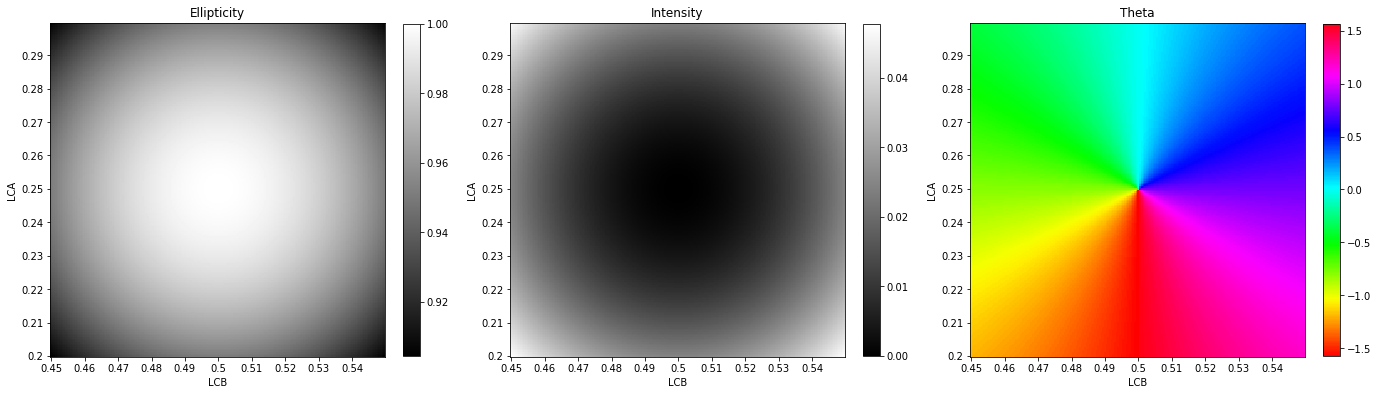

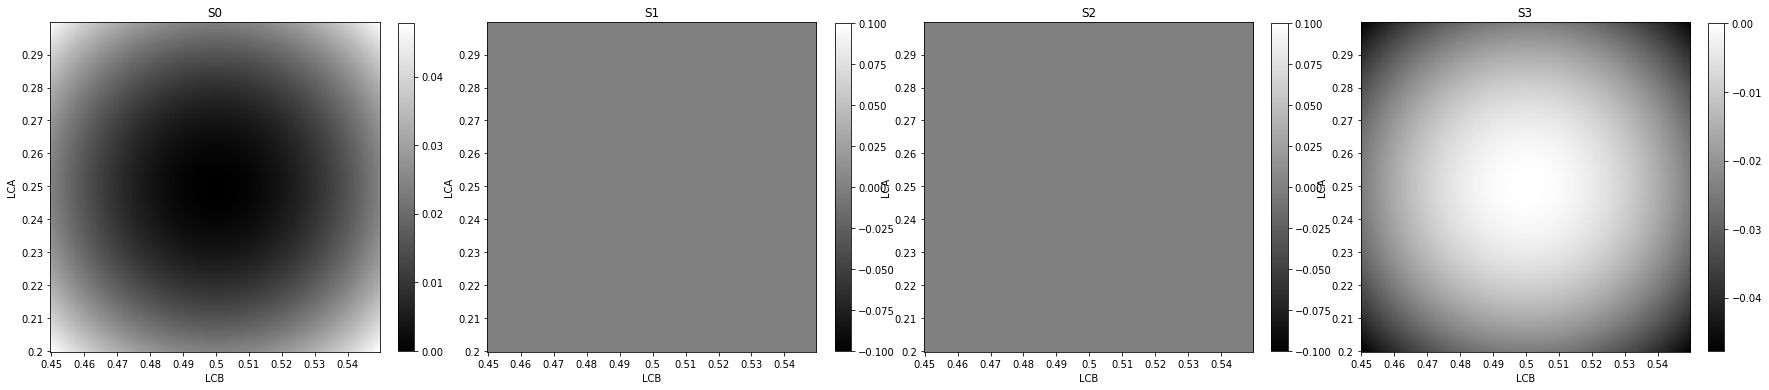

In [19]:
y_range = [0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]
x_range = [0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54]


fig, ax = plt.subplots(1,3, figsize=(20,20))
fig.tight_layout(pad=6)
im1 = ax[0].imshow(ez, "gray", origin = 'lower')
ax[0].set_title('Ellipticity')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,200,20))
ax[0].set_xticklabels(x_range, fontsize=10)
ax[0].set_yticks(np.arange(0,200,20))
ax[0].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)

im2 = ax[1].imshow(S0z, "gray", origin = 'lower')
ax[1].set_title('Intensity')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,200,20))
ax[1].set_xticklabels(x_range, fontsize=10)
ax[1].set_yticks(np.arange(0,200,20))
ax[1].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(thetaz, "hsv", origin = 'lower')
ax[2].set_title('Theta')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,200,20))
ax[2].set_xticklabels(x_range, fontsize=10)
ax[2].set_yticks(np.arange(0,200,20))
ax[2].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)
# fig.savefig('/Users/cameron.foltz/Desktop/SlidePics/200824_Calibration/sim_zoom.png')


fig, ax = plt.subplots(1,4, figsize=(30,30))
im1 = ax[0].imshow(S0z, "gray", origin = 'lower')
ax[0].set_title('S0')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,200,20))
ax[0].set_xticklabels(x_range, fontsize=10)
ax[0].set_yticks(np.arange(0,200,20))
ax[0].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)


im2 = ax[1].imshow(S1z, "gray", origin = 'lower')
ax[1].set_title('S1')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,200,20))
ax[1].set_xticklabels(x_range, fontsize=10)
ax[1].set_yticks(np.arange(0,200,20))
ax[1].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(S2z, "gray", origin = 'lower')
ax[2].set_title('S2')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,200,20))
ax[2].set_xticklabels(x_range, fontsize=10)
ax[2].set_yticks(np.arange(0,200,20))
ax[2].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)

im4 = ax[3].imshow(S3z, "gray", origin = 'lower')
ax[3].set_title('S3')
ax[3].set_xlabel('LCB')
ax[3].set_ylabel('LCA')
ax[3].set_xticks(np.arange(0,200,20))
ax[3].set_xticklabels(x_range, fontsize=10)
ax[3].set_yticks(np.arange(0,200,20))
ax[3].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im4, ax=ax[3], fraction=0.045)

In [80]:
np.min(S1z)

0.0

## Finding which LC Values correspond to 0, 60, 120 deg states

In [21]:
state60 = []
state120 = []
state0 = []
for i in range(len(thetaz[:,0])):
    for j in range(len(thetaz[0,:])):
        if np.pi/3-.0005 < thetaz[i,j] < np.pi/3 + .0005:
            state60.append((lca_z[i],lcb_z[j]))
        elif (-np.pi/3-.0005) < thetaz[i,j] < (-np.pi/3 + .0005):
            state120.append((lca_z[i],lcb_z[j]))
            
        elif (0-.000001) < thetaz[i,j] < (0 + .000001):
            state0.append((lca_z[i],lcb_z[j]))
        

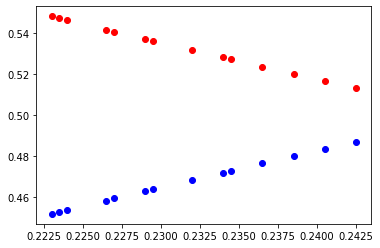

In [457]:
for i in range(len(state60)):
    plt.scatter(state60[i][0], state60[i][1], color = 'red')
    plt.scatter(state120[i][0], state120[i][1], color = 'blue')
    
plt.title()
plt.show()

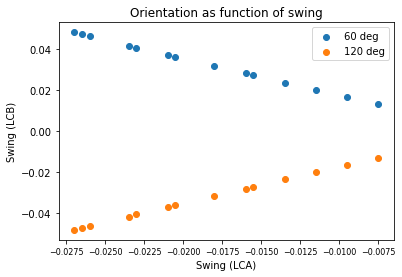

In [459]:
a120 = []
b120 = []
a60 = []
b60 = []
swinga = []
swingb120 = []
swingb60 = []


for i in range(len(state60)):
    a120.append(state120[i][0])
    b120.append(state120[i][1])
    a60.append(state60[i][0])
    b60.append(state60[i][1])
    swinga.append(state60[i][0]-0.25)
    swingb60.append(state60[i][1]-0.5)
    swingb120.append(state120[i][1]-0.5)
    
plt.scatter(swinga,swingb60, label="60 deg")
plt.scatter(swinga,swingb120, label="120 deg")
plt.ylabel('Swing (LCB)')
plt.xlabel('Swing (LCA)')
plt.xticks(fontsize=8)
plt.legend()
plt.title('Orientation as function of swing')
plt.savefig('/Users/cameron.foltz/Desktop/SlidePics/200824_Calibration/swing.png')
plt.show()
# plt.scatter(b60,a60)
# plt.title('60')
# plt.show()

In [460]:
from scipy.stats import linregress
linregress(swinga, swingb60)

LinregressResult(slope=-1.793327154772937, intercept=-0.0006408380775848946, rvalue=-0.9999457923500247, pvalue=3.6627310457324055e-25, stderr=0.005390534707323523)

## Simulate rotation of linear polarizer stage to confirm states

Simulate placing rotating linear polarizer on stage and rotation through 360 degrees

In [4]:
%%time

swing = 0.03
lca_swing = np.sqrt(swing/2.793)
lcb_swing = 1.8*lca_swing
print(lca_swing,lcb_swing)

deg60 = [0.25-lca_swing, 0.5+lcb_swing]
deg120 = [0.25-lca_swing, 0.5-lcb_swing]
deg0 = [0.2800000000000001, 0.5]
deg45 = [0.25, 0.53]
deg135 = [0.25, 0.47]
deg90 = [0.22,0.5]


degExt = [0.25, 0.5]
swing = 0.03

S_in = sp.Matrix([1, -1, 0, 0])

S0_0 = np.zeros(360)
S0_60 = np.zeros(360)
S0_120 = np.zeros(360)

S0_45 = np.zeros(360)
S0_135 = np.zeros(360)
S0_0 = np.zeros(360)
S0_90 = np.zeros(360)
S0_ext = np.zeros(360)


j = 0
for i in np.linspace(0,2*np.pi,360):
    M_lin = M_rotate(M_horiz_pol,i)
    M_uni_0 = M_Retarder(theta=0, delta = deg0[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg0[0]*2*np.pi)
    M_uni_60 = M_Retarder(theta=0, delta = deg60[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg60[0]*2*np.pi)
    M_uni_120 = M_Retarder(theta=0, delta = deg120[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg120[0]*2*np.pi)
    
    M_uni_ext = M_Retarder(theta=0, delta = degExt[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = degExt[0]*2*np.pi)
    M_uni_45 = M_Retarder(theta=0, delta = deg45[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg45[0]*2*np.pi)
    M_uni_90 = M_Retarder(theta=0, delta = deg90[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg90[0]*2*np.pi)
    M_uni_135 = M_Retarder(theta=0, delta = deg135[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg135[0]*2*np.pi)
    
#     S_out_0 = M_analyzer * M_lin * M_uni_0 * S_in
#     S_out_60 = M_analyzer * M_lin * M_uni_60 * S_in
#     S_out_120 = M_analyzer * M_lin * M_uni_120 * S_in
    
#     S_out_ext = M_analyzer * M_lin * M_uni_ext * S_in
#     S_out_45 = M_analyzer * M_lin * M_uni_45 * S_in
#     S_out_90 = M_analyzer * M_lin * M_uni_90 * S_in
#     S_out_135 = M_analyzer * M_lin * M_uni_135 * S_in
    
    S_out_0 =  M_lin * M_uni_0 * S_in
    S_out_60 = M_lin * M_uni_60 * S_in
    S_out_120 = M_lin * M_uni_120 * S_in
    
    S_out_ext = M_lin * M_uni_ext * S_in
    S_out_45 = M_lin * M_uni_45 * S_in
    S_out_90 = M_lin * M_uni_90 * S_in
    S_out_135 = M_lin * M_uni_135 * S_in
    
    S0_ext[j] = S_out_ext[0]
    S0_45[j] = S_out_45[0]
    S0_90[j] = S_out_90[0]
    S0_135[j] = S_out_135[0]
    
    S0_0[j] = S_out_0[0]
    S0_60[j] = S_out_60[0]
    S0_120[j] = S_out_120[0]
    j += 1
    

0.10363946430143023 0.18655103574257442
CPU times: user 3.94 s, sys: 22.5 ms, total: 3.96 s
Wall time: 3.99 s


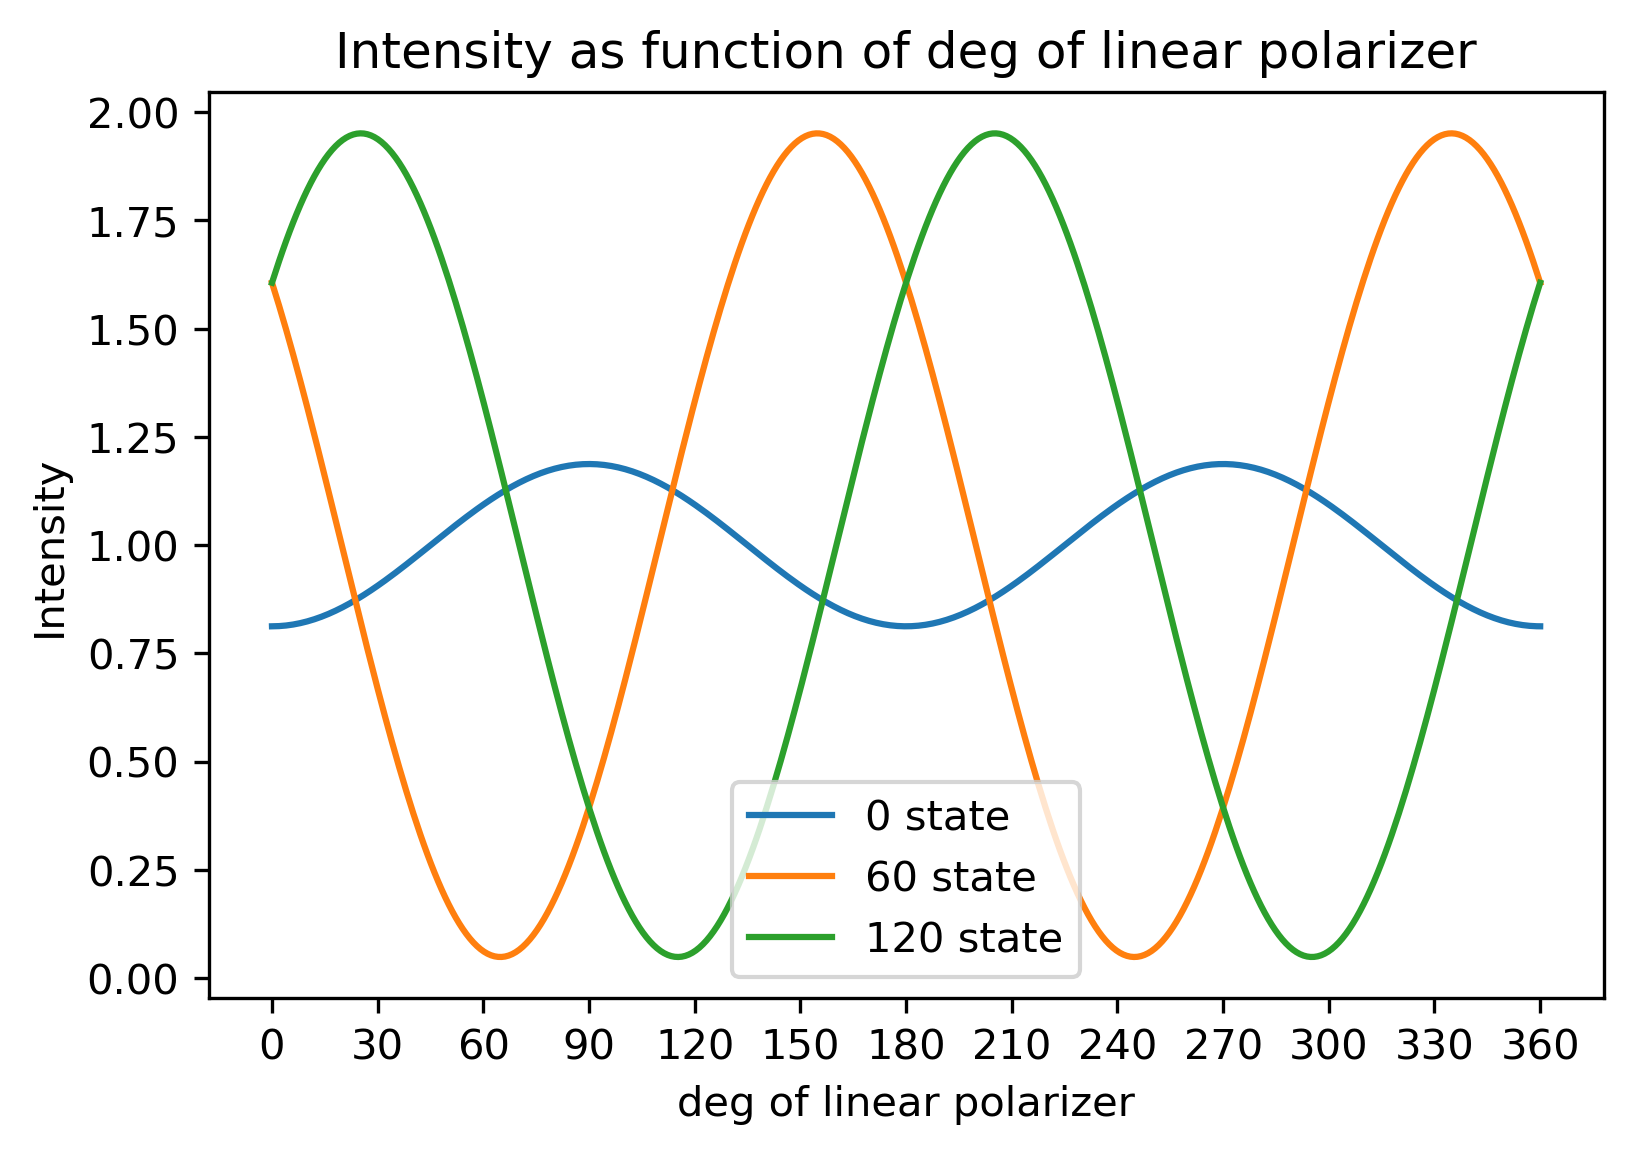

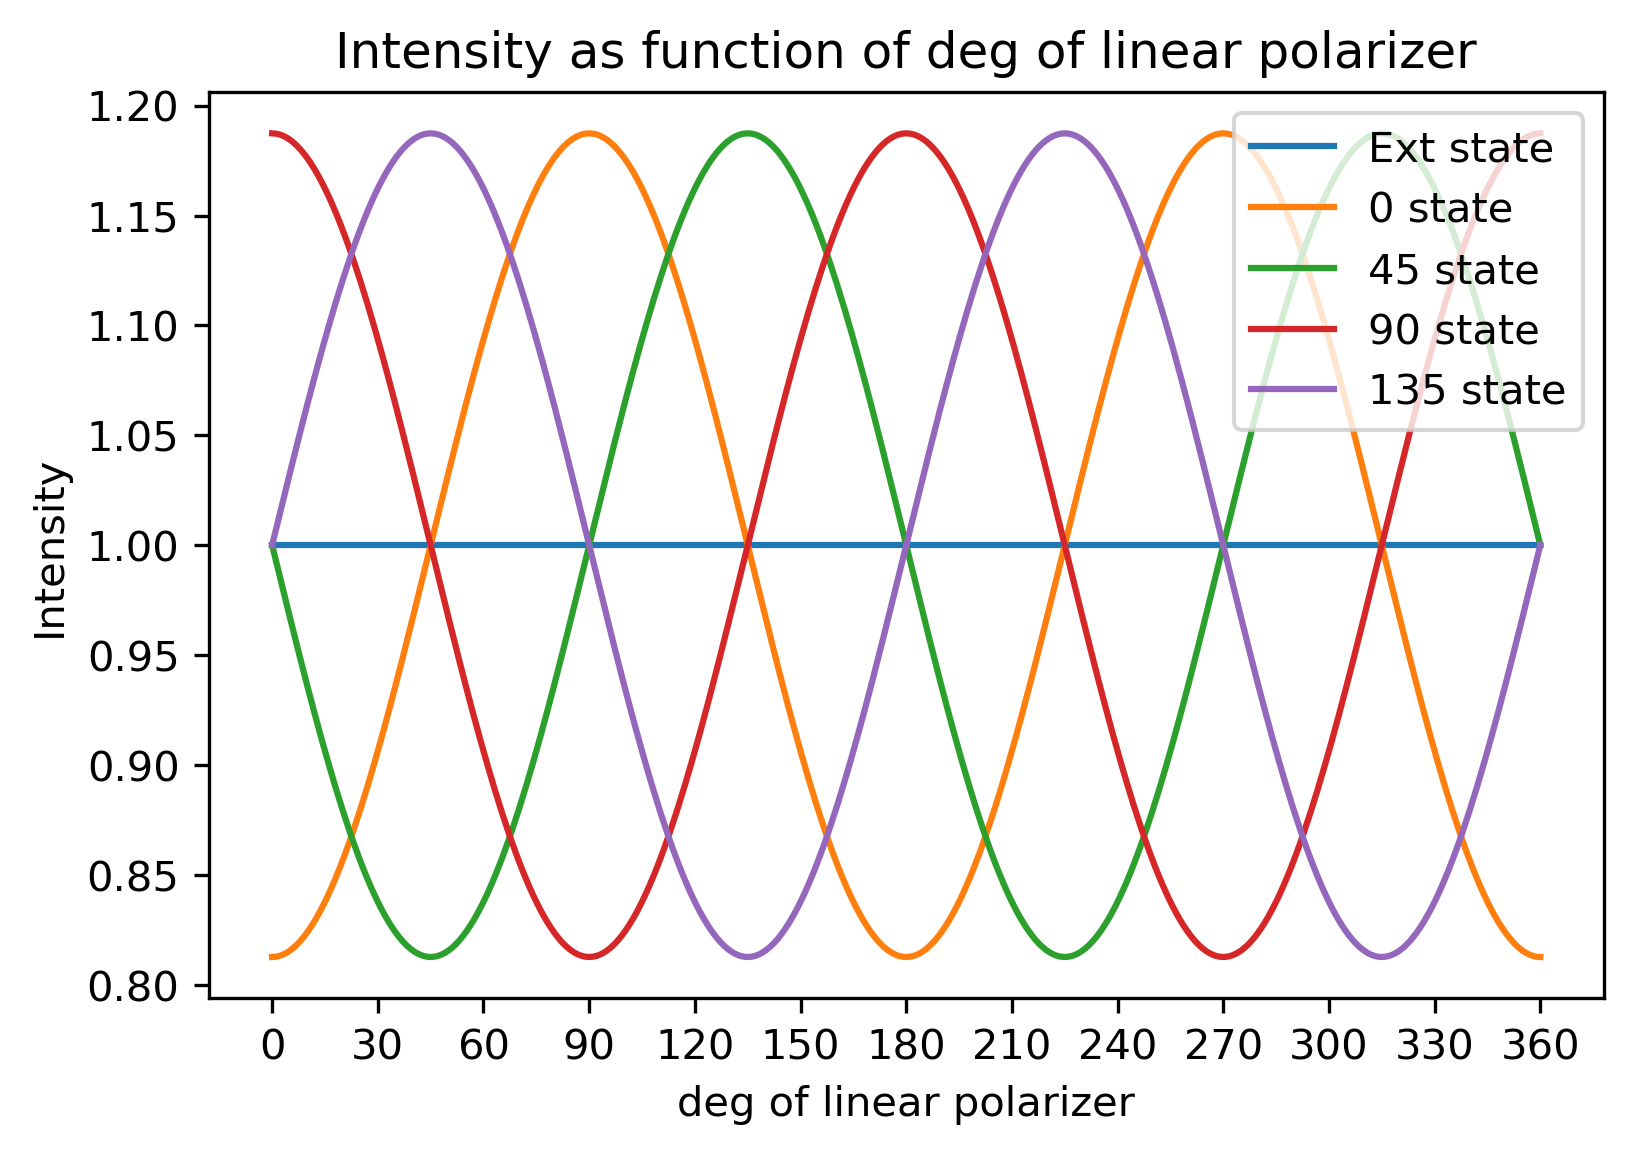

In [5]:
x = np.linspace(0,360,360)

plt.figure(dpi=300)
plt.xticks(np.arange(0,390,30))
plt.xlabel('deg of linear polarizer')
plt.ylabel('Intensity')
plt.title('Intensity as function of deg of linear polarizer')
plt.plot(x,S0_0, label='0 state')
plt.plot(x,S0_60, label='60 state')
plt.plot(x,S0_120, label='120 state')
plt.legend()
plt.show()

plt.figure(dpi=300)
plt.xticks(np.arange(0,390,30))
plt.xlabel('deg of linear polarizer')
plt.ylabel('Intensity')
plt.title('Intensity as function of deg of linear polarizer')
plt.plot(x,S0_ext, label='Ext state')
plt.plot(x,S0_0, label='0 state')
plt.plot(x,S0_45, label='45 state')
plt.plot(x,S0_90, label='90 state')
plt.plot(x,S0_135, label='135 state')
plt.legend()
plt.show()

0.10363946430143023 0.18655103574257442
CPU times: user 16.5 s, sys: 34.3 ms, total: 16.5 s
Wall time: 16.6 s


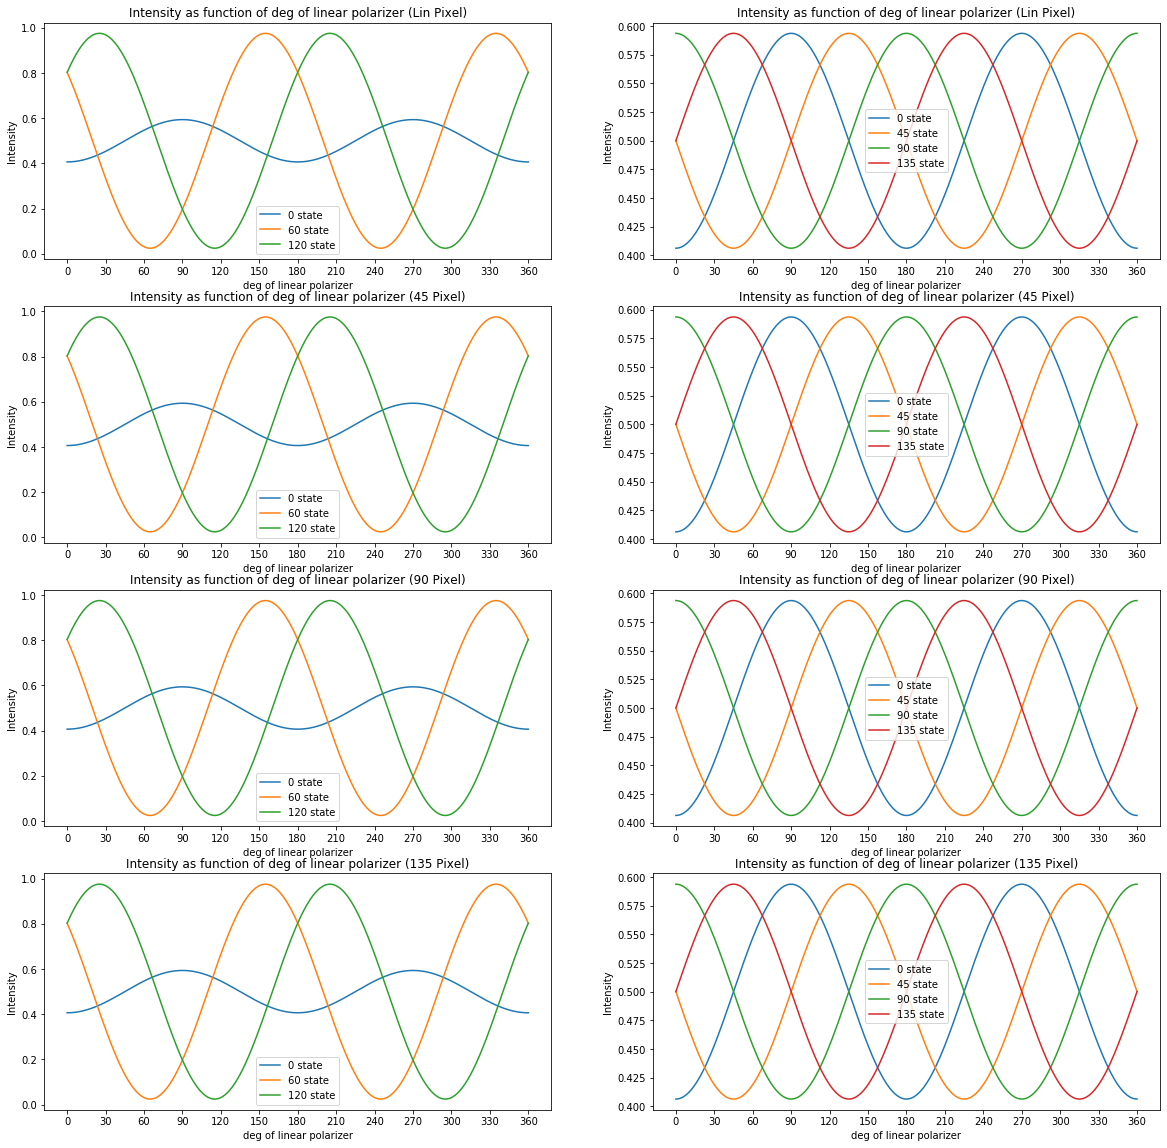

In [17]:
%%time

## ADD SIM FOR BLACKFLY

swing = 0.03
lca_swing = np.sqrt(swing/2.793)
lcb_swing = 1.8*lca_swing
print(lca_swing,lcb_swing)

deg60 = [0.25-lca_swing, 0.5+lcb_swing]
deg120 = [0.25-lca_swing, 0.5-lcb_swing]
deg0 = [0.2800000000000001, 0.5]
deg45 = [0.25, 0.53]
deg135 = [0.25, 0.47]
deg90 = [0.22,0.5]


degExt = [0.25, 0.5]
swing = 0.03

S_in = sp.Matrix([1, -1, 0, 0])

S0_0 = np.zeros(360)
S0_60 = np.zeros(360)
S0_120 = np.zeros(360)

S0_45 = np.zeros(360)
S0_135 = np.zeros(360)
S0_0 = np.zeros(360)
S0_90 = np.zeros(360)
S0_ext = np.zeros(360)


j = 0
# Lin Pixel
for i in np.linspace(0,2*np.pi,360):
    M_lin = M_rotate(M_horiz_pol,i)
    M_uni_0 = M_Retarder(theta=0, delta = deg0[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg0[0]*2*np.pi)
    M_uni_60 = M_Retarder(theta=0, delta = deg60[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg60[0]*2*np.pi)
    M_uni_120 = M_Retarder(theta=0, delta = deg120[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg120[0]*2*np.pi)
    
    M_uni_ext = M_Retarder(theta=0, delta = degExt[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = degExt[0]*2*np.pi)
    M_uni_45 = M_Retarder(theta=0, delta = deg45[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg45[0]*2*np.pi)
    M_uni_90 = M_Retarder(theta=0, delta = deg90[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg90[0]*2*np.pi)
    M_uni_135 = M_Retarder(theta=0, delta = deg135[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg135[0]*2*np.pi)
    
    S_out_0 = M_analyzerVert * M_analyzer * M_lin * M_uni_0 * S_in
    S_out_60 = M_analyzerVert * M_analyzer * M_lin * M_uni_60 * S_in
    S_out_120 = M_analyzerVert * M_analyzer * M_lin * M_uni_120 * S_in
    
    S_out_ext = M_analyzerVert * M_analyzer * M_lin * M_uni_ext * S_in
    S_out_45 = M_analyzerVert * M_analyzer * M_lin * M_uni_45 * S_in
    S_out_90 = M_analyzerVert * M_analyzer * M_lin * M_uni_90 * S_in
    S_out_135 = M_analyzerVert * M_analyzer * M_lin * M_uni_135 * S_in
    
    S0_ext[j] = S_out_ext[0]
    S0_45[j] = S_out_45[0]
    S0_90[j] = S_out_90[0]
    S0_135[j] = S_out_135[0]
    
    S0_0[j] = S_out_0[0]
    S0_60[j] = S_out_60[0]
    S0_120[j] = S_out_120[0]
    j += 1
    
    
fig, ax = plt.subplots(4,2, figsize=(20,20))
ax[0,0].plot(x,S0_0, label='0 state')
ax[0,0].plot(x,S0_60, label='60 state')
ax[0,0].plot(x,S0_120, label='120 state')
ax[0,0].set_xticks(np.arange(0,390,30))
ax[0,0].set_xlabel('deg of linear polarizer')
ax[0,0].set_ylabel('Intensity')
ax[0,0].set_title('Intensity as function of deg of linear polarizer (Lin Pixel)')
ax[0,0].legend()

ax[0,1].plot(x,S0_0, label='0 state')
ax[0,1].plot(x,S0_45, label='45 state')
ax[0,1].plot(x,S0_90, label='90 state')
ax[0,1].plot(x,S0_135, label='135 state')
ax[0,1].set_xticks(np.arange(0,390,30))
ax[0,1].set_xlabel('deg of linear polarizer')
ax[0,1].set_ylabel('Intensity')
ax[0,1].set_title('Intensity as function of deg of linear polarizer (Lin Pixel)')
ax[0,1].legend()

# 45 Pixel
j = 0
for i in np.linspace(0,2*np.pi,360):
    M_lin = M_rotate(M_horiz_pol,i)
    M_uni_0 = M_Retarder(theta=0, delta = deg0[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg0[0]*2*np.pi)
    M_uni_60 = M_Retarder(theta=0, delta = deg60[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg60[0]*2*np.pi)
    M_uni_120 = M_Retarder(theta=0, delta = deg120[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg120[0]*2*np.pi)
    
    M_uni_ext = M_Retarder(theta=0, delta = degExt[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = degExt[0]*2*np.pi)
    M_uni_45 = M_Retarder(theta=0, delta = deg45[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg45[0]*2*np.pi)
    M_uni_90 = M_Retarder(theta=0, delta = deg90[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg90[0]*2*np.pi)
    M_uni_135 = M_Retarder(theta=0, delta = deg135[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg135[0]*2*np.pi)
    
    S_out_0 = M_lin_45 * M_analyzer * M_lin * M_uni_0 * S_in
    S_out_60 = M_lin_45 * M_analyzer * M_lin * M_uni_60 * S_in
    S_out_120 = M_lin_45 * M_analyzer * M_lin * M_uni_120 * S_in
    
    S_out_ext = M_lin_45 * M_analyzer * M_lin * M_uni_ext * S_in
    S_out_45 = M_lin_45 * M_analyzer * M_lin * M_uni_45 * S_in
    S_out_90 = M_lin_45 * M_analyzer * M_lin * M_uni_90 * S_in
    S_out_135 = M_lin_45 * M_analyzer * M_lin * M_uni_135 * S_in
    
    S0_ext[j] = S_out_ext[0]
    S0_45[j] = S_out_45[0]
    S0_90[j] = S_out_90[0]
    S0_135[j] = S_out_135[0]
    
    S0_0[j] = S_out_0[0]
    S0_60[j] = S_out_60[0]
    S0_120[j] = S_out_120[0]
    j += 1
    
ax[1,0].plot(x,S0_0, label='0 state')
ax[1,0].plot(x,S0_60, label='60 state')
ax[1,0].plot(x,S0_120, label='120 state')
ax[1,0].set_xticks(np.arange(0,390,30))
ax[1,0].set_xlabel('deg of linear polarizer')
ax[1,0].set_ylabel('Intensity')
ax[1,0].set_title('Intensity as function of deg of linear polarizer (45 Pixel)')
ax[1,0].legend()

ax[1,1].plot(x,S0_0, label='0 state')
ax[1,1].plot(x,S0_45, label='45 state')
ax[1,1].plot(x,S0_90, label='90 state')
ax[1,1].plot(x,S0_135, label='135 state')
ax[1,1].set_xticks(np.arange(0,390,30))
ax[1,1].set_xlabel('deg of linear polarizer')
ax[1,1].set_ylabel('Intensity')
ax[1,1].set_title('Intensity as function of deg of linear polarizer (45 Pixel)')
ax[1,1].legend()

# 90 Pixel
j = 0
for i in np.linspace(0,2*np.pi,360):
    M_lin = M_rotate(M_horiz_pol,i)
    M_uni_0 = M_Retarder(theta=0, delta = deg0[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg0[0]*2*np.pi)
    M_uni_60 = M_Retarder(theta=0, delta = deg60[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg60[0]*2*np.pi)
    M_uni_120 = M_Retarder(theta=0, delta = deg120[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg120[0]*2*np.pi)
    
    M_uni_ext = M_Retarder(theta=0, delta = degExt[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = degExt[0]*2*np.pi)
    M_uni_45 = M_Retarder(theta=0, delta = deg45[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg45[0]*2*np.pi)
    M_uni_90 = M_Retarder(theta=0, delta = deg90[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg90[0]*2*np.pi)
    M_uni_135 = M_Retarder(theta=0, delta = deg135[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg135[0]*2*np.pi)
    
    S_out_0 = M_lin_90 * M_analyzer * M_lin * M_uni_0 * S_in
    S_out_60 = M_lin_90 * M_analyzer * M_lin * M_uni_60 * S_in
    S_out_120 = M_lin_90 * M_analyzer * M_lin * M_uni_120 * S_in
    
    S_out_ext = M_lin_90 * M_analyzer * M_lin * M_uni_ext * S_in
    S_out_45 = M_lin_90 * M_analyzer * M_lin * M_uni_45 * S_in
    S_out_90 = M_lin_90 * M_analyzer * M_lin * M_uni_90 * S_in
    S_out_135 = M_lin_90 * M_analyzer * M_lin * M_uni_135 * S_in
    
    S0_ext[j] = S_out_ext[0]
    S0_45[j] = S_out_45[0]
    S0_90[j] = S_out_90[0]
    S0_135[j] = S_out_135[0]
    
    S0_0[j] = S_out_0[0]
    S0_60[j] = S_out_60[0]
    S0_120[j] = S_out_120[0]
    j += 1
    
    
ax[2,0].plot(x,S0_0, label='0 state')
ax[2,0].plot(x,S0_60, label='60 state')
ax[2,0].plot(x,S0_120, label='120 state')
ax[2,0].set_xticks(np.arange(0,390,30))
ax[2,0].set_xlabel('deg of linear polarizer')
ax[2,0].set_ylabel('Intensity')
ax[2,0].set_title('Intensity as function of deg of linear polarizer (90 Pixel)')
ax[2,0].legend()

ax[2,1].plot(x,S0_0, label='0 state')
ax[2,1].plot(x,S0_45, label='45 state')
ax[2,1].plot(x,S0_90, label='90 state')
ax[2,1].plot(x,S0_135, label='135 state')
ax[2,1].set_xticks(np.arange(0,390,30))
ax[2,1].set_xlabel('deg of linear polarizer')
ax[2,1].set_ylabel('Intensity')
ax[2,1].set_title('Intensity as function of deg of linear polarizer (90 Pixel)')
ax[2,1].legend()

# 135 Pixel
j = 0
for i in np.linspace(0,2*np.pi,360):
    M_lin = M_rotate(M_horiz_pol,i)
    M_uni_0 = M_Retarder(theta=0, delta = deg0[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg0[0]*2*np.pi)
    M_uni_60 = M_Retarder(theta=0, delta = deg60[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg60[0]*2*np.pi)
    M_uni_120 = M_Retarder(theta=0, delta = deg120[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg120[0]*2*np.pi)
    
    M_uni_ext = M_Retarder(theta=0, delta = degExt[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = degExt[0]*2*np.pi)
    M_uni_45 = M_Retarder(theta=0, delta = deg45[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg45[0]*2*np.pi)
    M_uni_90 = M_Retarder(theta=0, delta = deg90[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg90[0]*2*np.pi)
    M_uni_135 = M_Retarder(theta=0, delta = deg135[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg135[0]*2*np.pi)
    
    S_out_0 = M_lin_135 * M_analyzer * M_lin * M_uni_0 * S_in
    S_out_60 = M_lin_135 * M_analyzer * M_lin * M_uni_60 * S_in
    S_out_120 = M_lin_135 * M_analyzer * M_lin * M_uni_120 * S_in
    
    S_out_ext = M_lin_135 * M_analyzer * M_lin * M_uni_ext * S_in
    S_out_45 = M_lin_135 * M_analyzer * M_lin * M_uni_45 * S_in
    S_out_90 = M_lin_135 * M_analyzer * M_lin * M_uni_90 * S_in
    S_out_135 = M_lin_135 * M_analyzer * M_lin * M_uni_135 * S_in
    
    S0_ext[j] = S_out_ext[0]
    S0_45[j] = S_out_45[0]
    S0_90[j] = S_out_90[0]
    S0_135[j] = S_out_135[0]
    
    S0_0[j] = S_out_0[0]
    S0_60[j] = S_out_60[0]
    S0_120[j] = S_out_120[0]
    j += 1
    
    
ax[3,0].plot(x,S0_0, label='0 state')
ax[3,0].plot(x,S0_60, label='60 state')
ax[3,0].plot(x,S0_120, label='120 state')
ax[3,0].set_xticks(np.arange(0,390,30))
ax[3,0].set_xlabel('deg of linear polarizer')
ax[3,0].set_ylabel('Intensity')
ax[3,0].set_title('Intensity as function of deg of linear polarizer (135 Pixel)')
ax[3,0].legend()

ax[3,1].plot(x,S0_0, label='0 state')
ax[3,1].plot(x,S0_45, label='45 state')
ax[3,1].plot(x,S0_90, label='90 state')
ax[3,1].plot(x,S0_135, label='135 state')
ax[3,1].set_xticks(np.arange(0,390,30))
ax[3,1].set_xlabel('deg of linear polarizer')
ax[3,1].set_ylabel('Intensity')
ax[3,1].set_title('Intensity as function of deg of linear polarizer (135 Pixel)')
ax[3,1].legend()

In [25]:
S_out_60

Matrix([
[ 0.803065051468017],
[                 0],
[                 0],
[-0.803065051468017]])

## Sanity Checking

In [91]:
M_LCP = sp.Matrix([[1, 0, 0, -1],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0],
                        [-1, 0, 0, 1]])/2

M_RCP = sp.Matrix([[1, 0, 0, 1],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0],
                        [1, 0, 0, 1]])/2

M_uni = M_Retarder(theta=0, delta = 0.5*2*np.pi) * M_Retarder(theta=np.pi/4, delta = 0.25*2*np.pi)
S_out = M_uni * S_in
S_final = M_LCP * S_out

S_final

Matrix([
[0],
[0],
[0],
[0]])